In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:

df_train=pd.read_csv('tested.csv')# import the csv file
df_train.head(100)# read the csv file

PassengerId  Survived  Pclass  \
0           892         0       3   
1           893         1       3   
2           894         0       2   
3           895         0       3   
4           896         1       3   
..          ...       ...     ...   
95          987         0       3   
96          988         1       1   
97          989         0       3   
98          990         1       3   
99          991         0       3   

                                                 Name     Sex   Age  SibSp  \
0                                    Kelly, Mr. James    male  34.5      0   
1                    Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2                           Myles, Mr. Thomas Francis    male  62.0      0   
3                                    Wirz, Mr. Albert    male  27.0      0   
4        Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   
..                                                ...     ...   ...    ...   
95                         Tenglin, Mr. Gunnar Isidor    male  25.0      0   
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   
97                          Makinen, Mr. Kalle Edvard    male  29.0      0   
98                       Braf, Miss. Elin Ester Maria  female  20.0      0   
99                       Nancarrow, Mr. William Henry    male  33.0      0   

    Parch             Ticket     Fare Cabin Embarked  
0       0             330911   7.8292   NaN        Q  
1       0             363272   7.0000   NaN        S  
2       0             240276   9.6875   NaN        Q  
3       0             315154   8.6625   NaN        S  
4       1            3101298  12.2875   NaN        S  
..    ...                ...      ...   ...      ...  
95      0             350033   7.7958   NaN        S  
96      0              19877  78.8500   C46        S  
97      0  STON/O 2. 3101268   7.9250   NaN        S  
98      0             347471   7.8542   NaN        S  
99      0         A./5. 3338   8.0500   NaN        S  

[100 rows x 12 columns]

In [7]:
df_train.describe()# used to the aggreagte value of numerical column

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [8]:
df_train.shape # used to identify the rows and columns in the dataframe

(418, 12)

In [9]:
for i in df_train.columns:# this code use to get the column name
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [10]:
# Data Cleaning

In [11]:
missed_vales=df_train.isnull().sum()#identify the misisng values in dataset
missed_vales

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_train["Cabin"].value_counts()# Value_counts() used for the number occurence of the record in the particular column

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [13]:
len(df_train)

418

In [14]:
missed_vales/len(df_train) * 100 # percentage  of missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [15]:
df_train.dropna(subset = ['Fare'], inplace=True)# drop the missing values record in the Fare column


In [16]:
 df_train.shape

(417, 12)

In [17]:

df_train['Cabin']=df_train['Cabin'].replace(to_replace= np.nan,
           value="Unknown")

In [18]:
df_train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [19]:
df_train['Cabin'].fillna("Unknown",inplace=True)

In [20]:
df_train['Cabin'].value_counts().unique

<bound method Series.unique of Cabin
Unknown            326
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64>

In [21]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])

In [22]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
# Outliers are those data points that are significantly different from the rest of the dataset. here i am using the boxplot.

<Axes: >

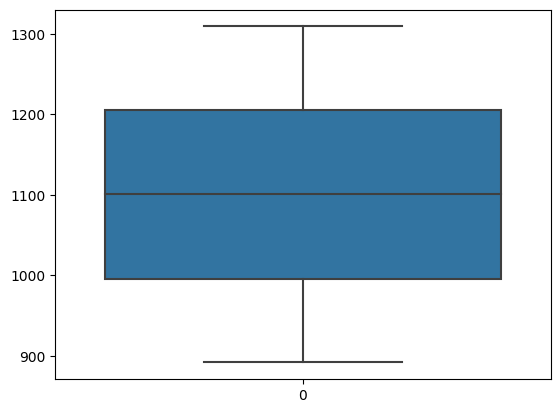

In [24]:

sns.boxplot(df_train['PassengerId'])


<Axes: >

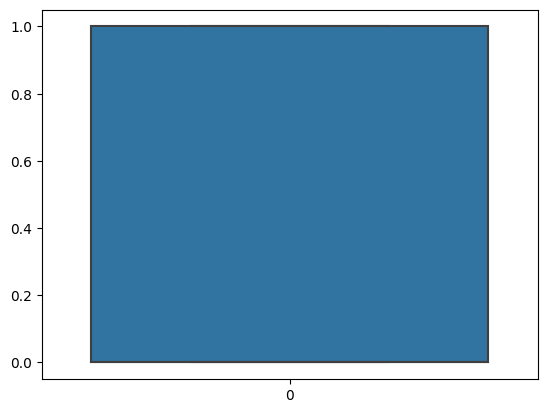

In [25]:
sns.boxplot(df_train['Survived'])

<Axes: >

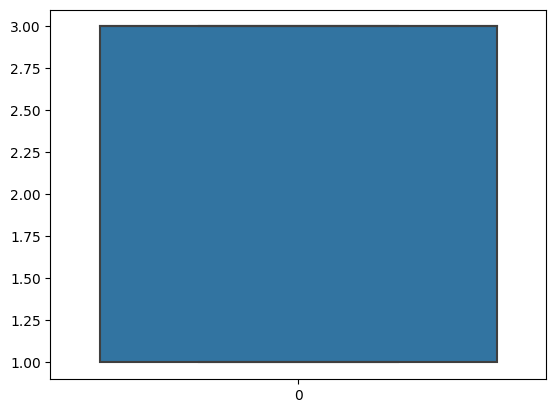

In [26]:
sns.boxplot(df_train['Pclass'])

<Axes: >

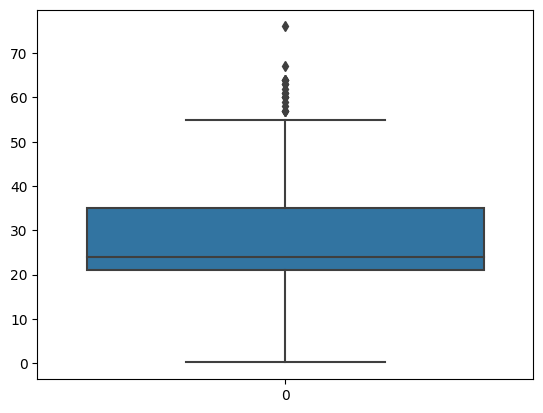

In [27]:
sns.boxplot(df_train['Age'])

In [28]:
df_train['Sex'].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

In [34]:
df_train['Sex']=df_train['Sex'].replace("female",2)


In [35]:
df_train['Sex'].value_counts()

Sex
1    265
2    152
Name: count, dtype: int64

<Axes: >

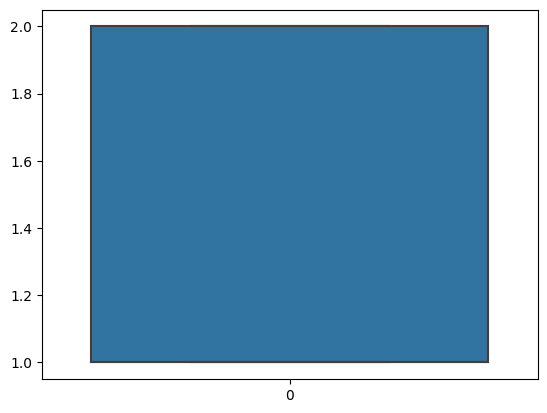

In [36]:
sns.boxplot(df_train['Sex'])

<Axes: >

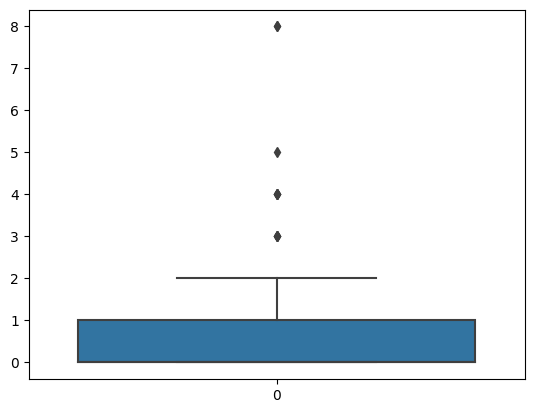

In [37]:
sns.boxplot(df_train['SibSp'])

<Axes: >

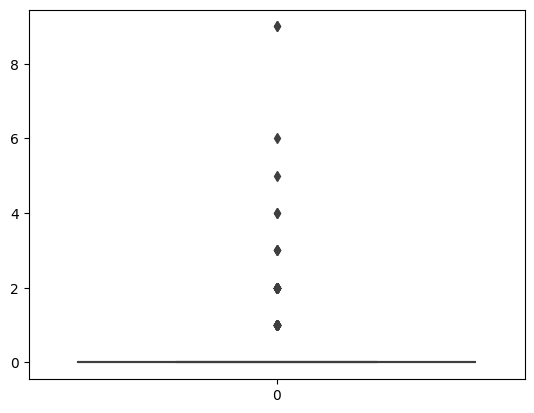

In [38]:
sns.boxplot(df_train['Parch'])

In [39]:
df_train['Embarked'].value_counts()

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64

<Axes: >

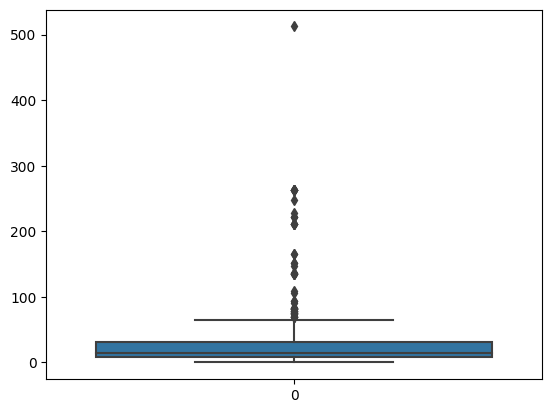

In [40]:
sns.boxplot(df_train['Fare'])

In [41]:
#Univariate anlaysis

In [ ]:
#A scatter plot is a diagram where each value in the data set is represented by a dot.

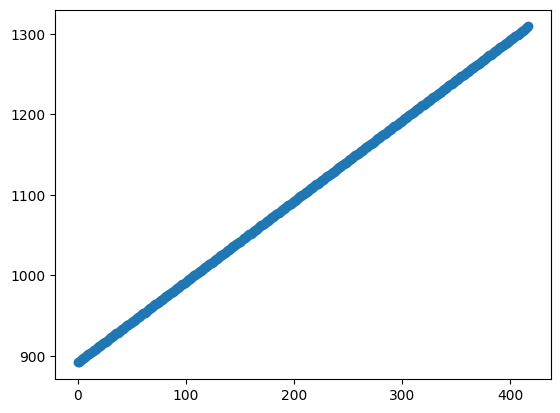

In [43]:
plt.scatter(df_train.index,df_train['PassengerId'])
plt.show()

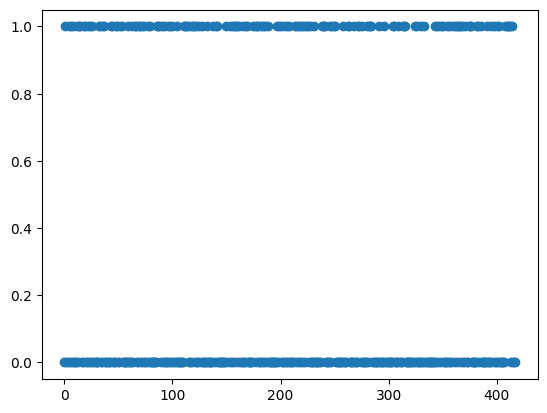

In [44]:
plt.scatter(df_train.index,df_train['Survived'])

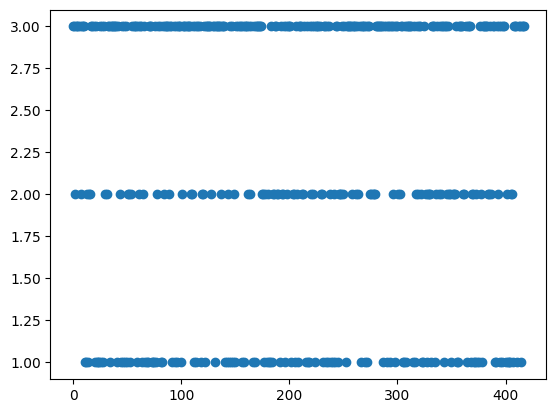

In [45]:
plt.scatter(df_train.index,df_train['Pclass'])

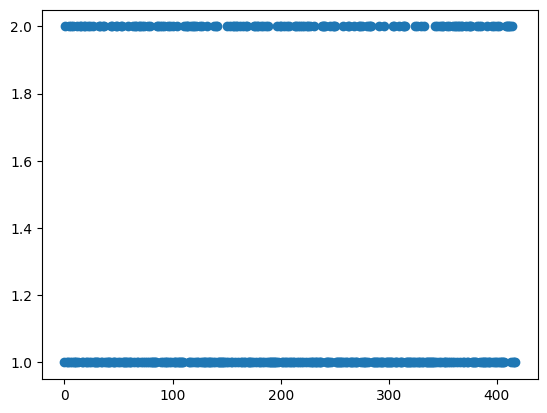

In [46]:
plt.scatter(df_train.index,df_train['Sex'])

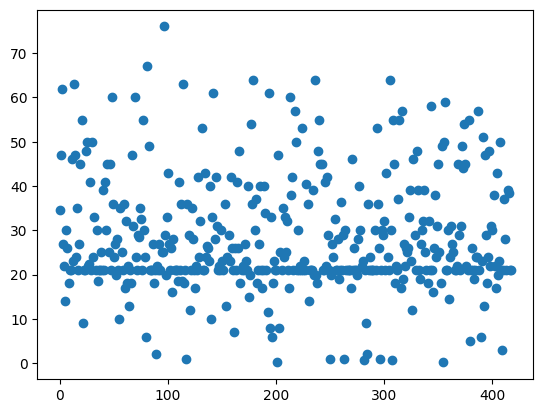

In [47]:
plt.scatter(df_train.index,df_train['Age'])

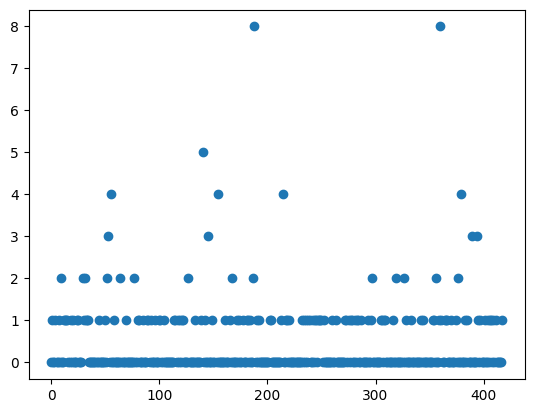

In [48]:
plt.scatter(df_train.index,df_train['SibSp'])

In [49]:
import matplotlib as plt
plt.scatter(df_train,df_train['Parch'])

AttributeError: module 'matplotlib' has no attribute 'scatter'

In [50]:
from matplotlib import pyplot as plt

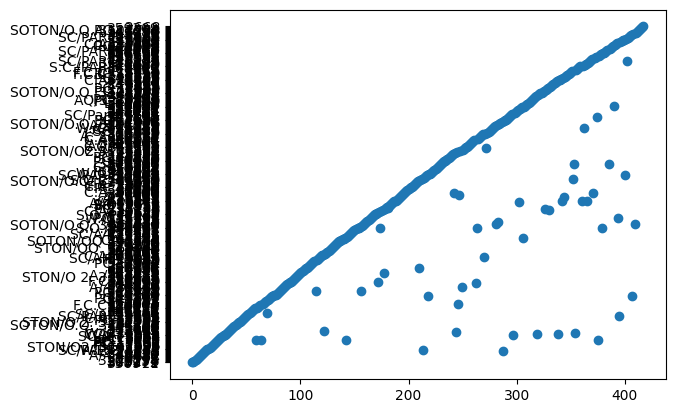

In [51]:
plt.scatter(df_train.index,df_train['Ticket'] )


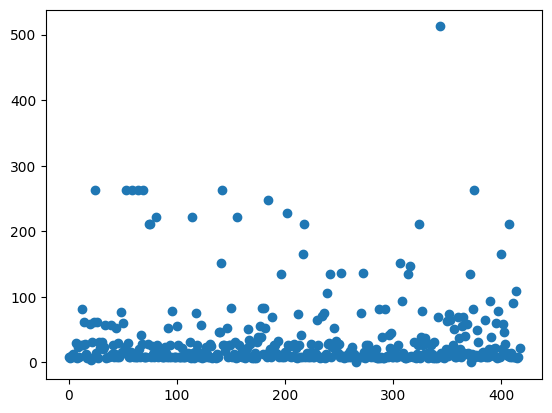

In [52]:
plt.scatter(df_train.index,df_train['Fare'])

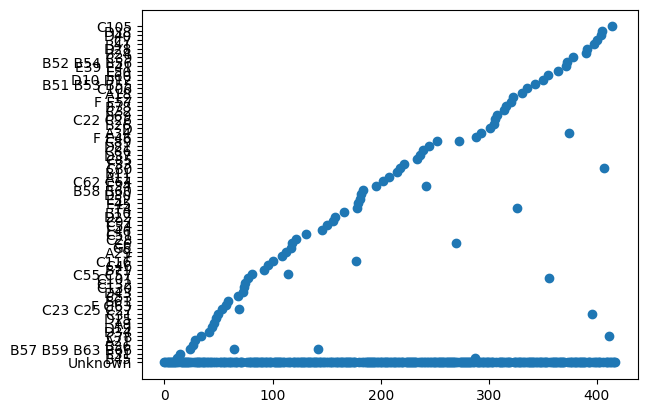

In [53]:
plt.scatter(df_train.index,df_train['Cabin'])

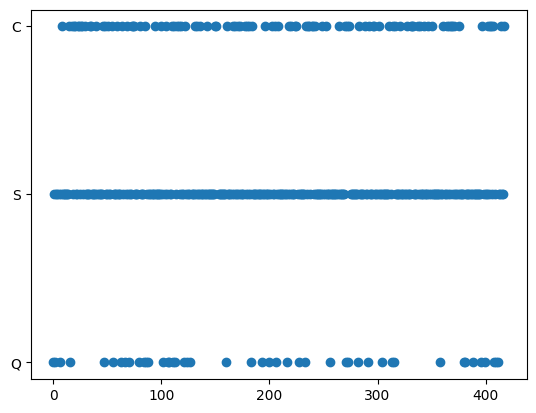

In [54]:
plt.scatter(df_train.index,df_train['Embarked'])

<Axes: ylabel='PassengerId'>

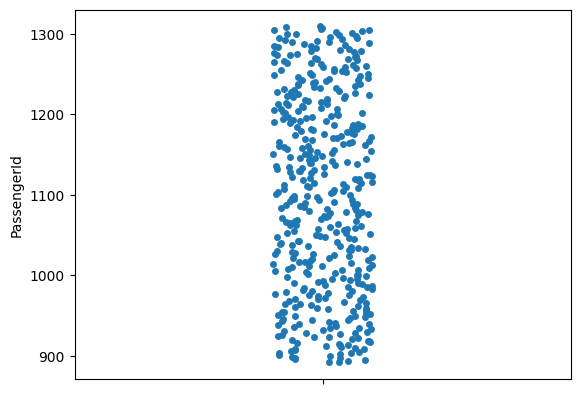

In [55]:
sns.stripplot(y=df_train['PassengerId'])

In [ ]:
#StripPlot

<Axes: ylabel='Survived'>

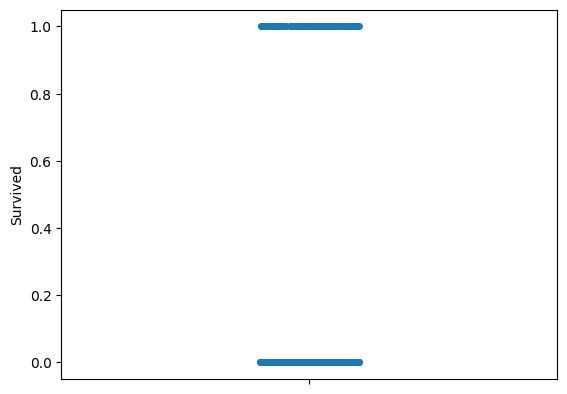

In [56]:
sns.stripplot(y=df_train['Survived'])

<Axes: ylabel='Pclass'>

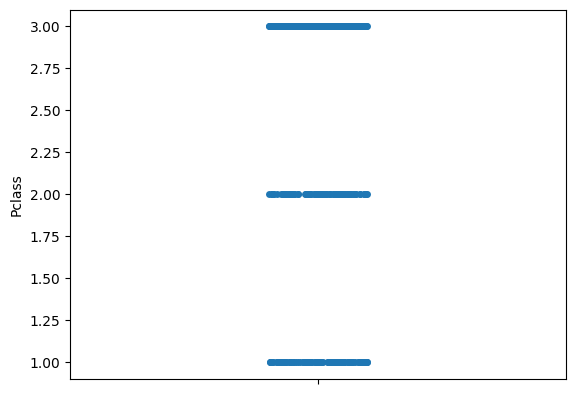

In [57]:
sns.stripplot(y=df_train['Pclass'])

<Axes: ylabel='SibSp'>

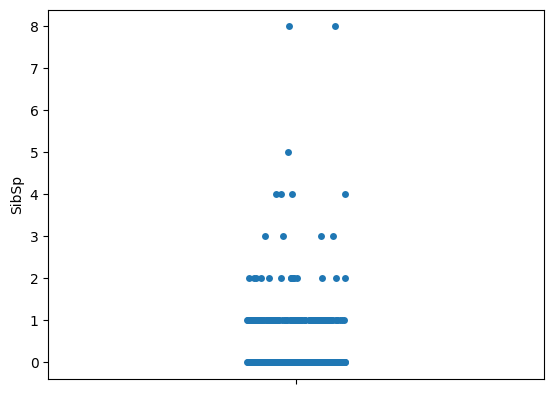

In [58]:
sns.stripplot(y=df_train['SibSp'])

<Axes: ylabel='Age'>

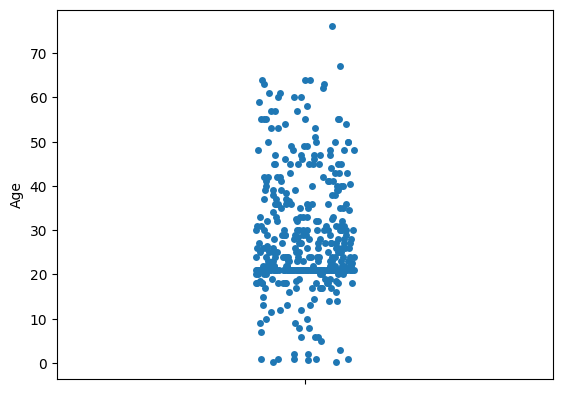

In [59]:
sns.stripplot(y=df_train['Age'])

<Axes: ylabel='Parch'>

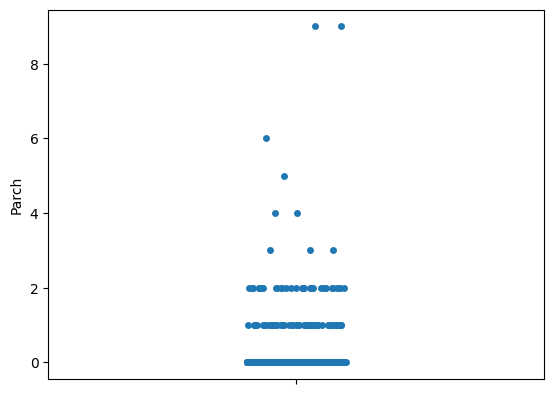

In [60]:
sns.stripplot(y=df_train['Parch'])

<Axes: ylabel='Ticket'>

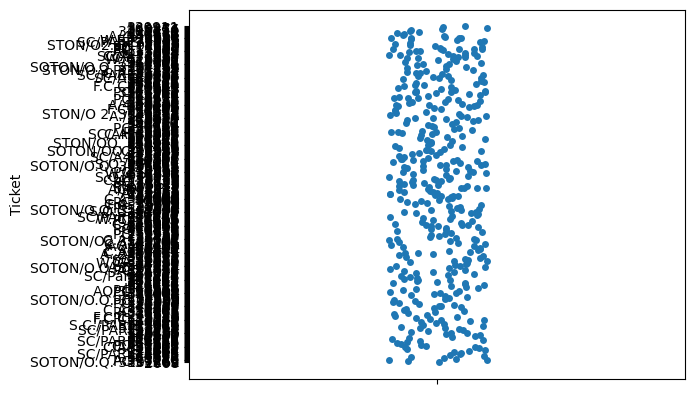

In [61]:
sns.stripplot(y=df_train['Ticket'])

<Axes: ylabel='Cabin'>

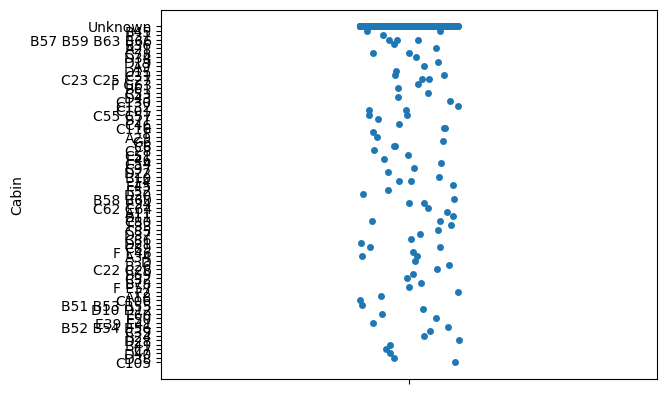

In [62]:
sns.stripplot(y=df_train['Cabin'])

<Axes: ylabel='Fare'>

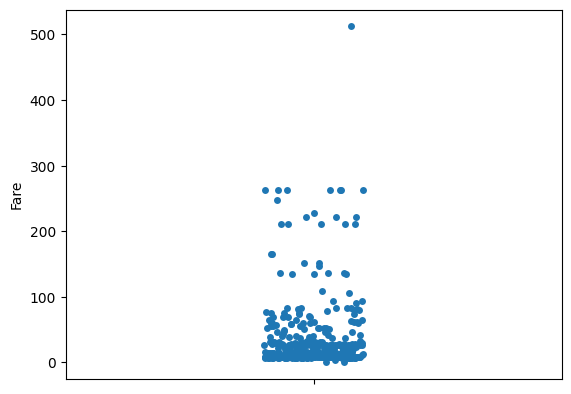

In [63]:
sns.stripplot(y=df_train['Fare'])

<Axes: ylabel='Embarked'>

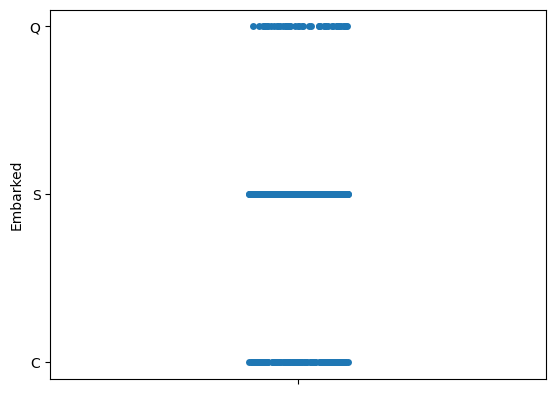

In [64]:
sns.stripplot(y=df_train['Embarked'])

In [ ]:
#Swarm Plot in Seaborn is used to draw a categorical scatterplot with non-overlapping points.

<Axes: ylabel='PassengerId'>

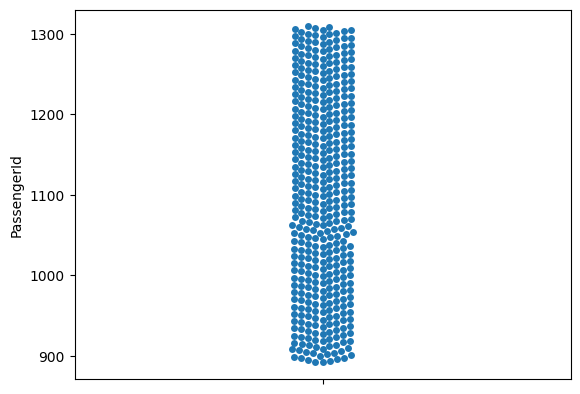

In [65]:
sns.swarmplot(y=df_train['PassengerId'])

<Axes: ylabel='Survived'>

C:\Users\ARUNKUMAR K\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


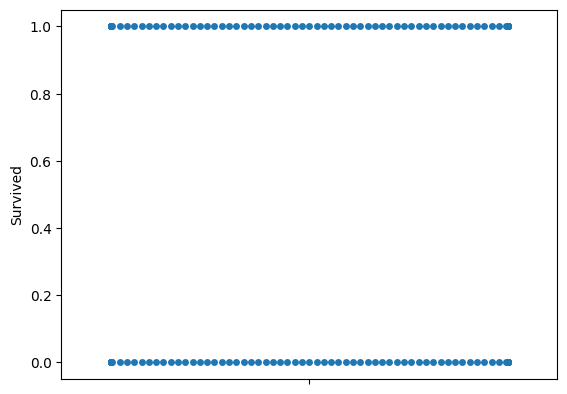

In [66]:
sns.swarmplot(y=df_train['Survived'])

<Axes: ylabel='Pclass'>

C:\Users\ARUNKUMAR K\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


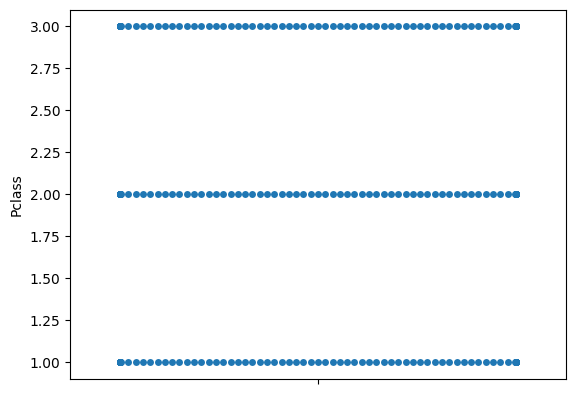

In [29]:
sns.swarmplot(y=df_train['Pclass'])

<Axes: ylabel='Age'>

C:\Users\ARUNKUMAR K\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


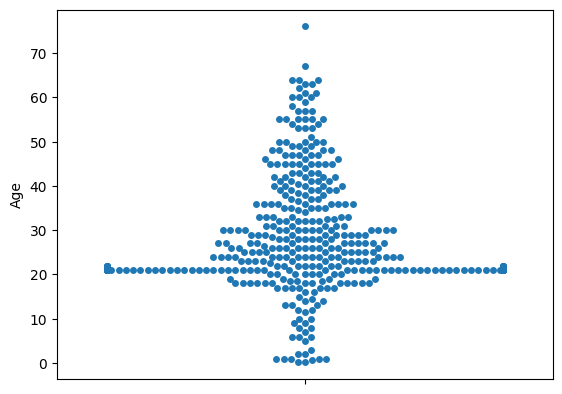

In [30]:
sns.swarmplot(y=df_train['Age'])

<Axes: ylabel='SibSp'>

C:\Users\ARUNKUMAR K\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


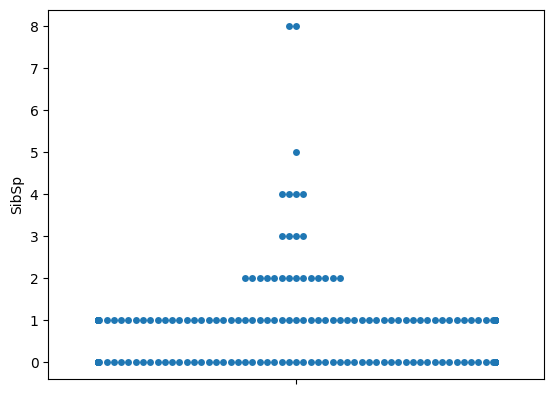

In [31]:
sns.swarmplot(y=df_train['SibSp'])

<Axes: ylabel='Ticket'>

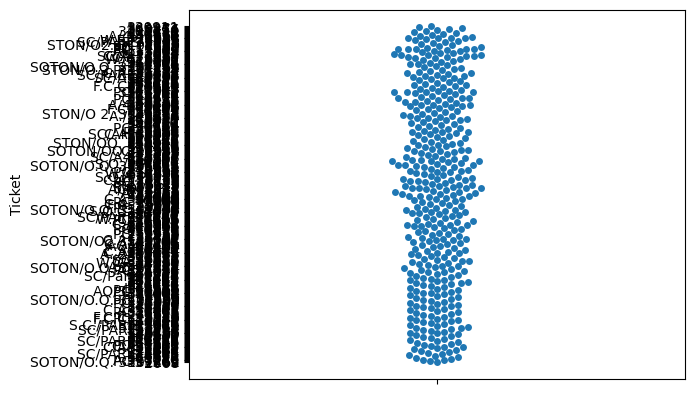

In [32]:
sns.swarmplot(y=df_train['Ticket'])

<Axes: ylabel='Parch'>

C:\Users\ARUNKUMAR K\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


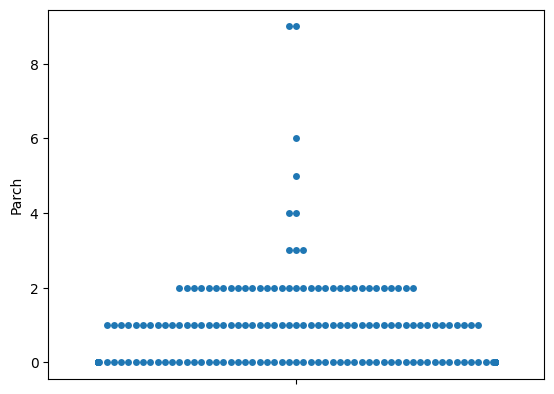

In [33]:
sns.swarmplot(y=df_train['Parch'])

In [ ]:
#A histogram is a graph showing frequency distributions. It is a graph showing the number of observations within each given interval.

(array([42., 42., 42., 40., 42., 42., 41., 42., 42., 42.]),
 array([ 892. ,  933.7,  975.4, 1017.1, 1058.8, 1100.5, 1142.2, 1183.9,
        1225.6, 1267.3, 1309. ]),
 <BarContainer object of 10 artists>)

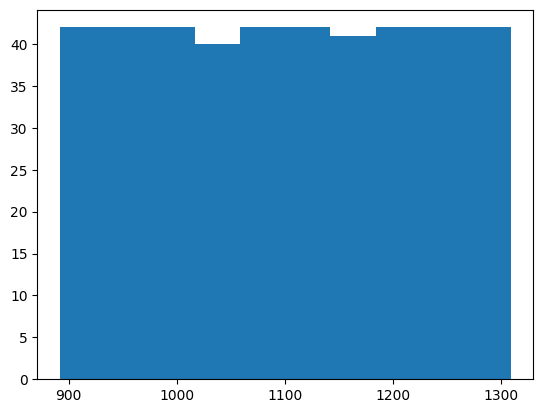

In [72]:
plt.hist(df_train['PassengerId'])

(array([265.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

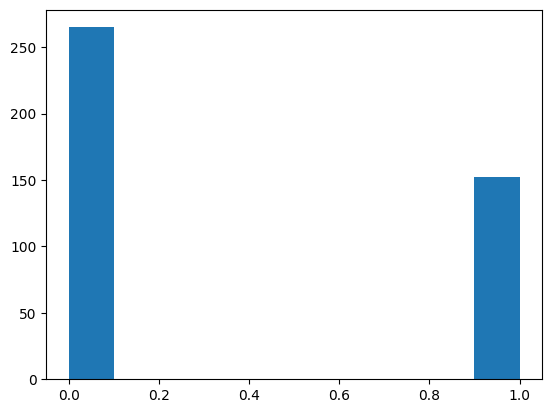

In [73]:
plt.hist(df_train['Survived'])

(array([107.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0., 217.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

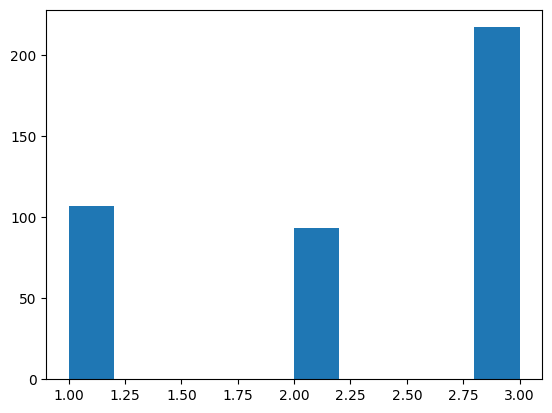

In [74]:
plt.hist(df_train['Pclass'])

(array([282., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

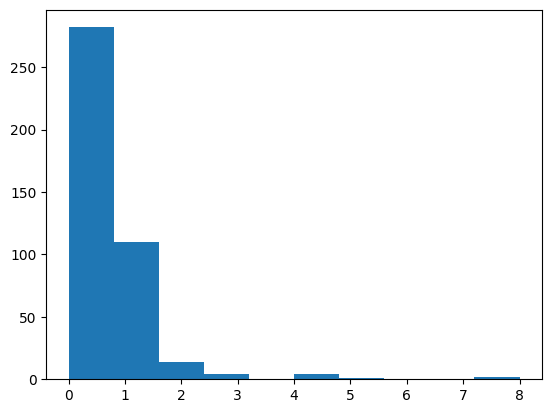

In [75]:
plt.hist(df_train['SibSp'])

(array([323.,  52.,  33.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

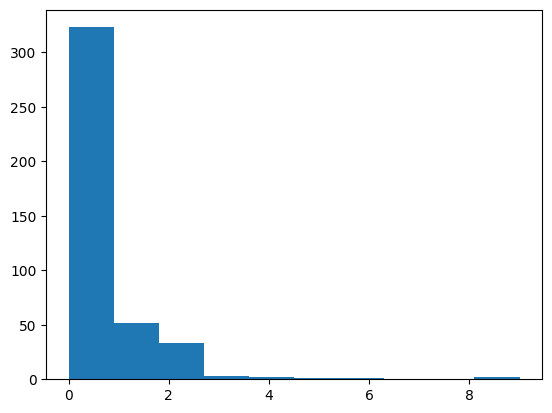

In [76]:
plt.hist(df_train['Parch'])

(array([49., 42., 43., 40., 51., 42., 38., 38., 37., 37.]),
 array([  0. ,  36.1,  72.2, 108.3, 144.4, 180.5, 216.6, 252.7, 288.8,
        324.9, 361. ]),
 <BarContainer object of 10 artists>)

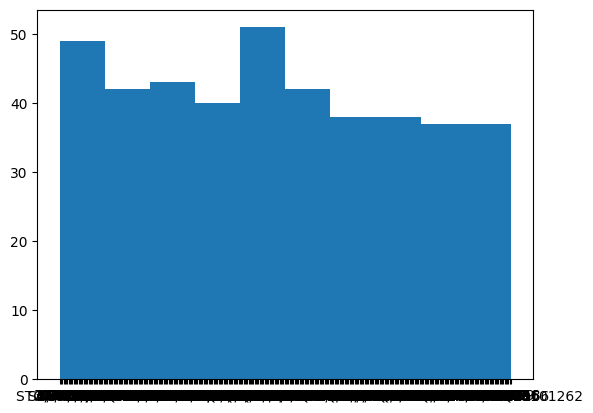

In [77]:
plt.hist(df_train['Ticket'])

(array([ 16.,  16., 157.,  97.,  43.,  37.,  25.,  16.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

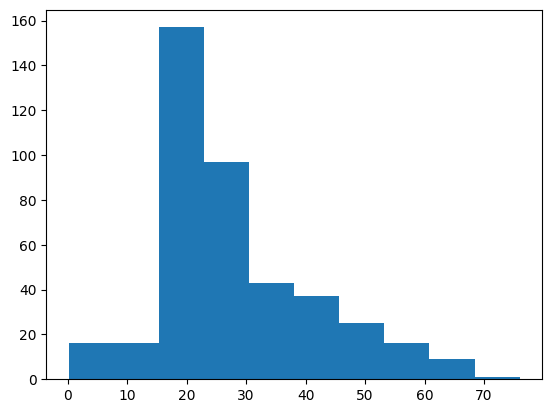

In [78]:
 plt.hist(df_train['Age'])

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

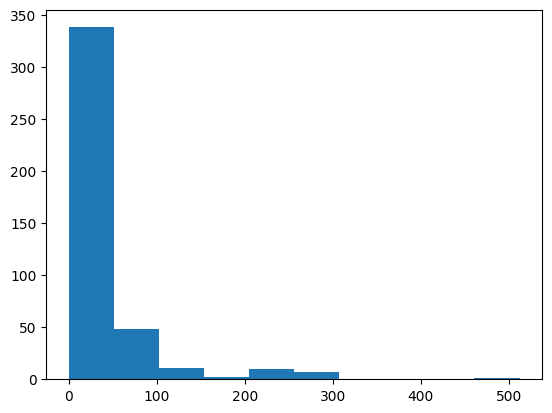

In [79]:
plt.hist(df_train['Fare'])

(array([337.,  10.,   9.,  10.,   8.,  10.,  10.,   7.,   8.,   8.]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <BarContainer object of 10 artists>)

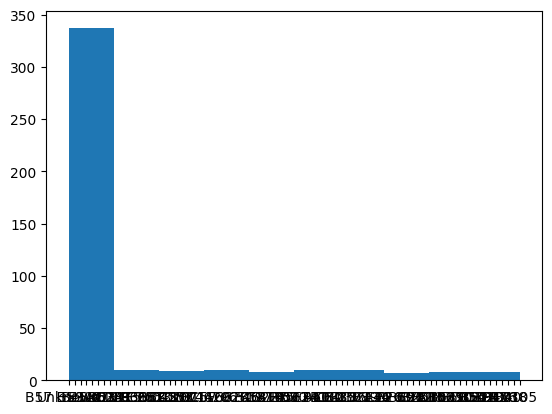

In [80]:
plt.hist(df_train['Cabin'])

(array([ 46.,   0.,   0.,   0.,   0., 269.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

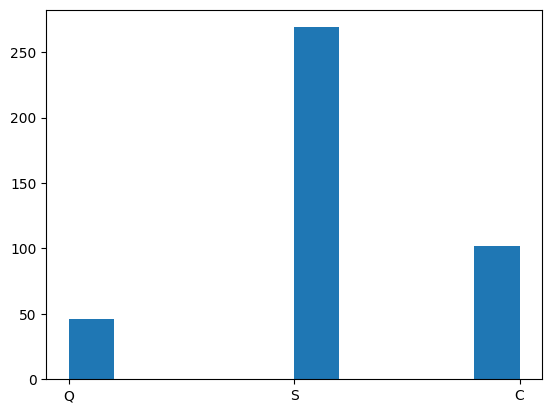

In [81]:
plt.hist(df_train['Embarked'])

In [83]:
#Bivariate analysis

In [ ]:
#Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent.

<Axes: ylabel='PassengerId'>

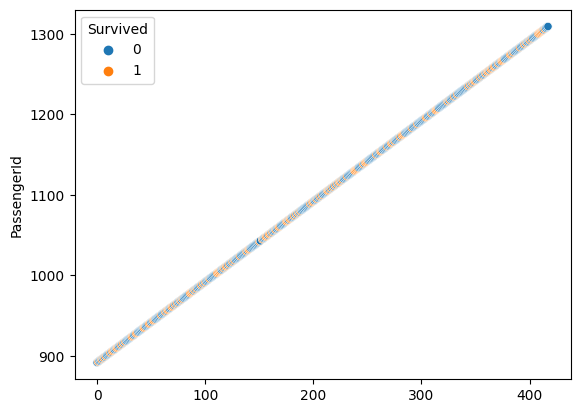

In [84]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Survived'])

<Axes: ylabel='PassengerId'>

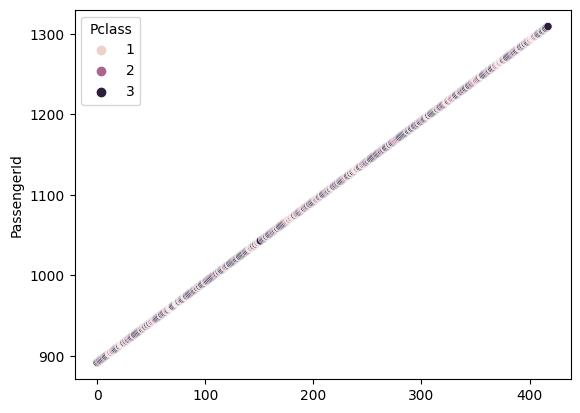

In [85]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Pclass'])

<Axes: ylabel='PassengerId'>

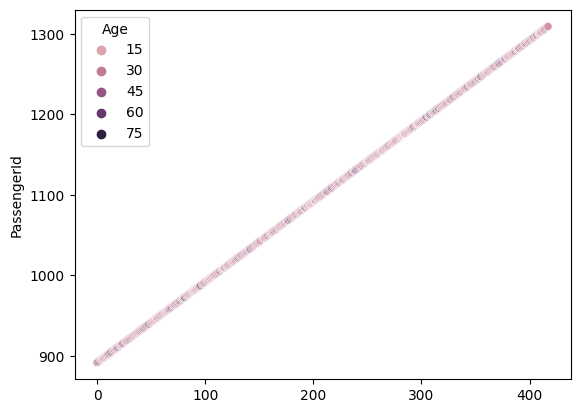

In [86]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Age'])

<Axes: ylabel='PassengerId'>

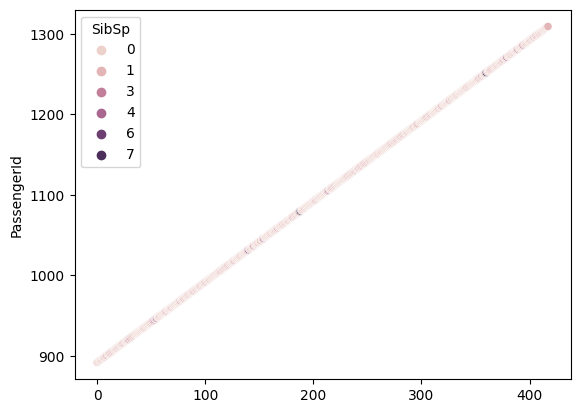

In [87]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['SibSp'])

<Axes: ylabel='PassengerId'>

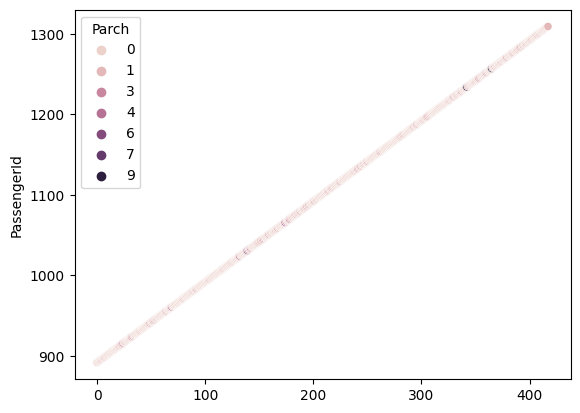

In [88]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Parch'])

<Axes: ylabel='PassengerId'>

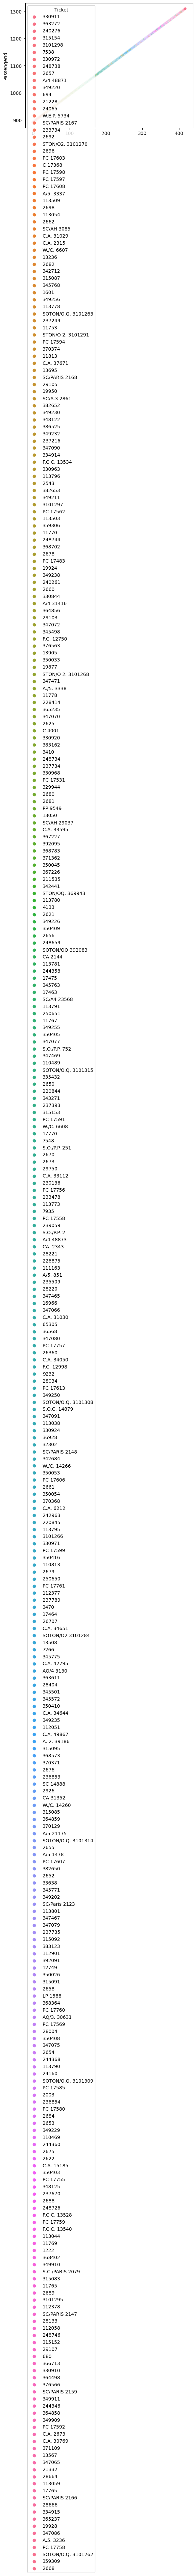

In [89]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Ticket'])

<Axes: ylabel='PassengerId'>

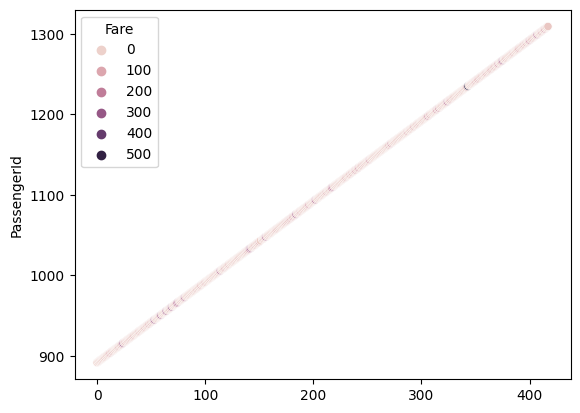

In [90]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Fare'])

<Axes: ylabel='PassengerId'>

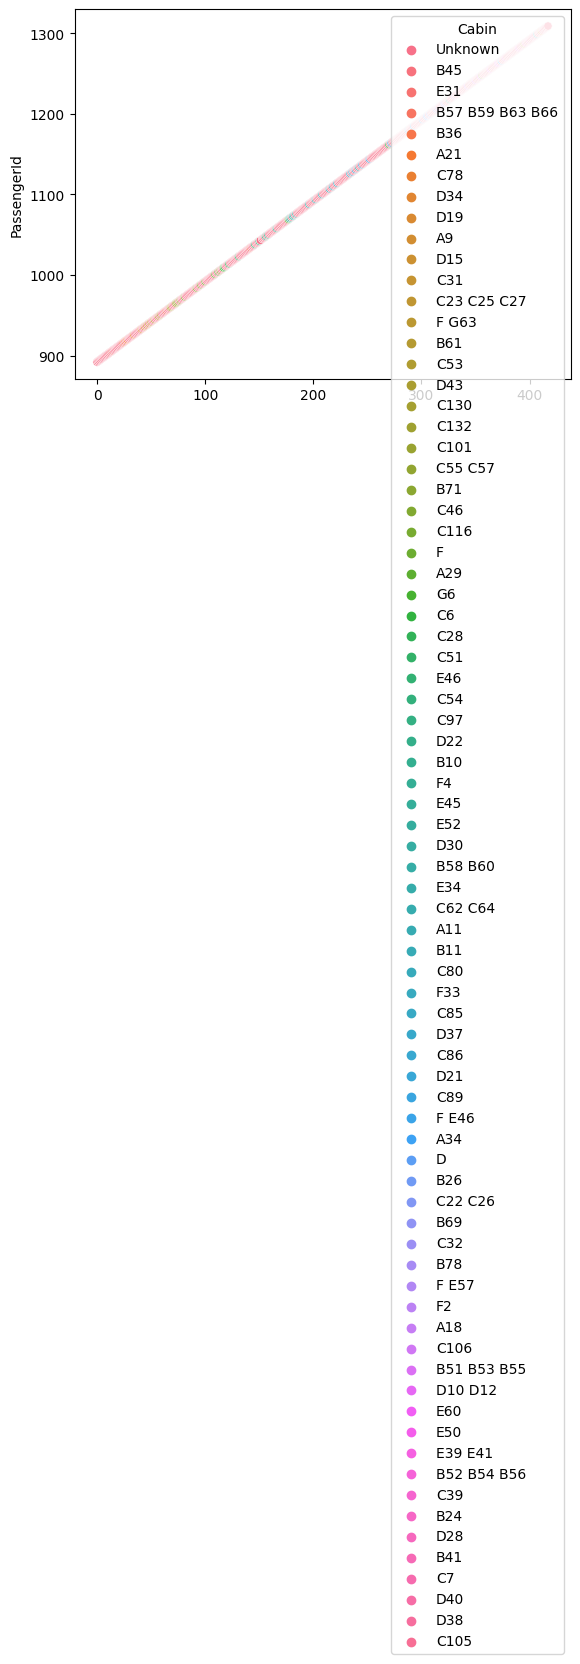

In [91]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Cabin'])

<Axes: ylabel='PassengerId'>

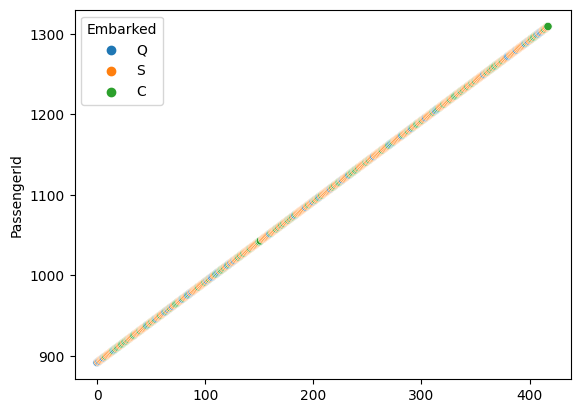

In [92]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Embarked'])

<Axes: ylabel='Survived'>

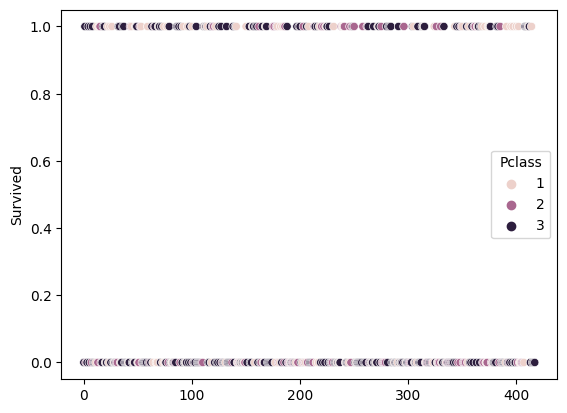

In [93]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Pclass'])

<Axes: ylabel='Survived'>

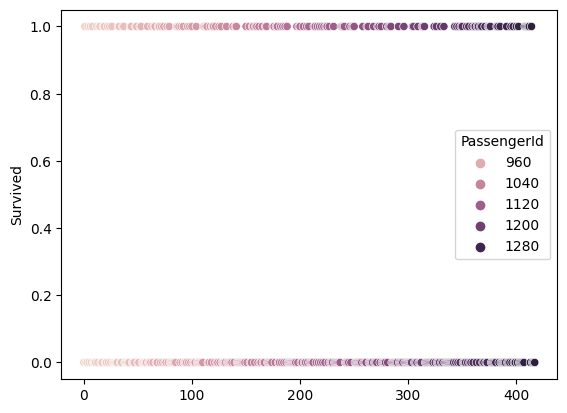

In [94]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['PassengerId'])

<Axes: ylabel='Survived'>

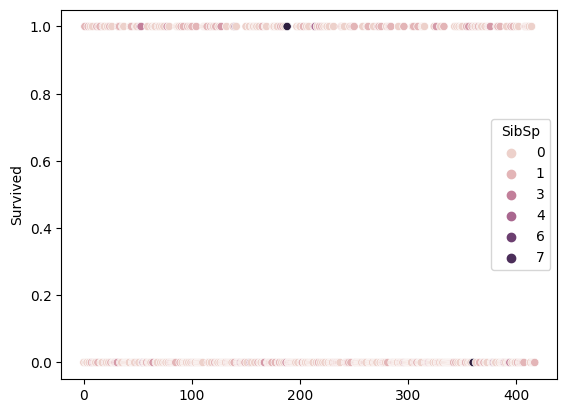

In [95]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['SibSp'])

<Axes: ylabel='Survived'>

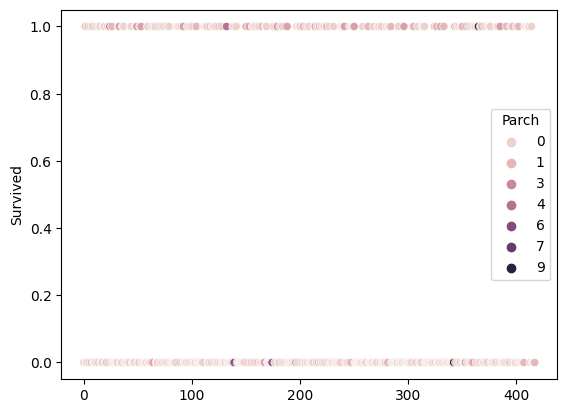

In [96]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Parch'])

<Axes: ylabel='Survived'>

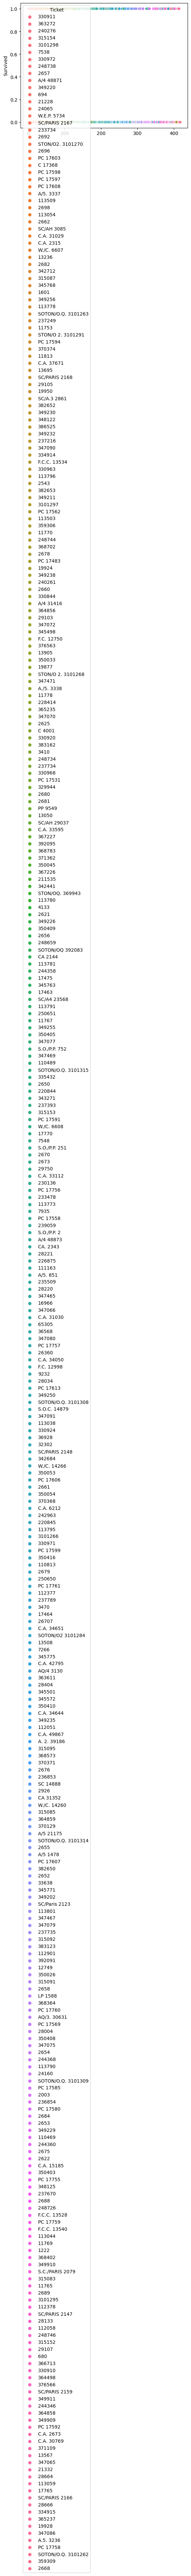

In [97]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Ticket'])

<Axes: ylabel='Survived'>

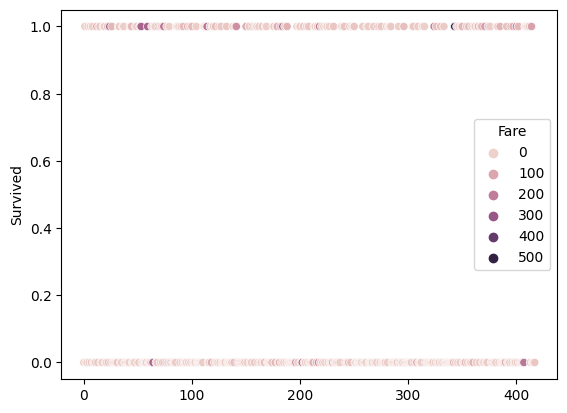

In [98]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Fare'])

<Axes: ylabel='Survived'>

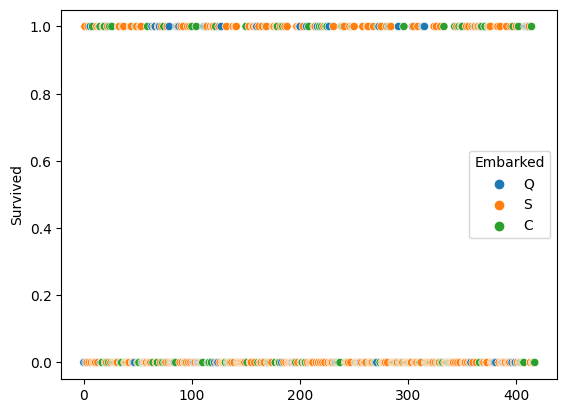

In [99]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Embarked'])

<Axes: ylabel='Pclass'>

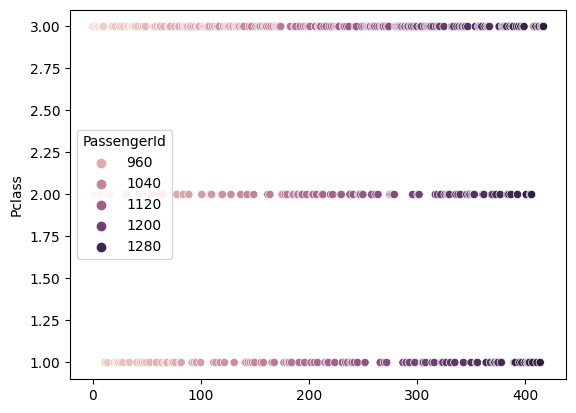

In [100]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['PassengerId'])

<Axes: ylabel='Pclass'>

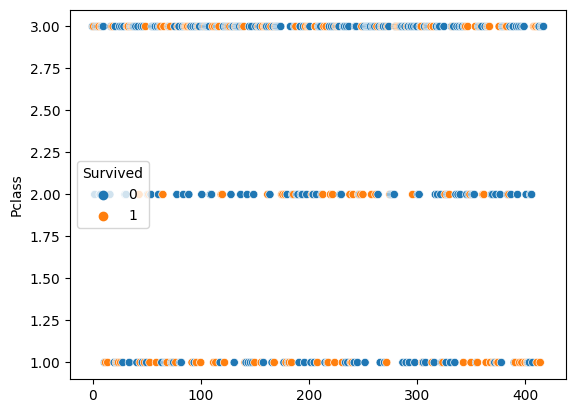

In [101]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Survived'])

<Axes: ylabel='Pclass'>

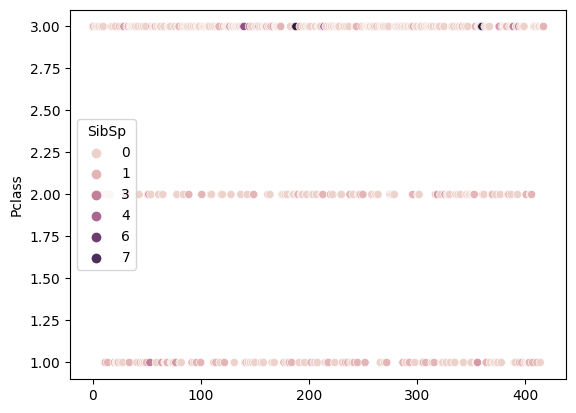

In [102]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['SibSp'])

<Axes: ylabel='Pclass'>

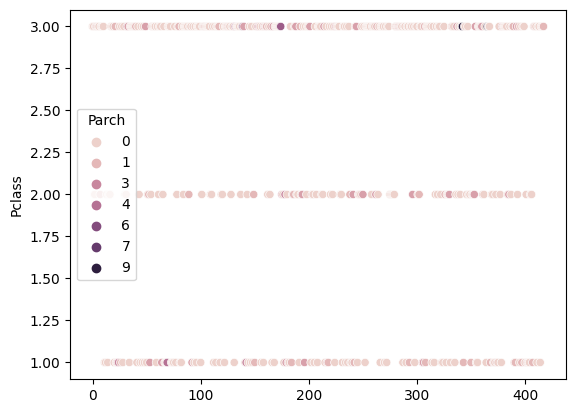

In [103]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Parch'])

<Axes: ylabel='Pclass'>

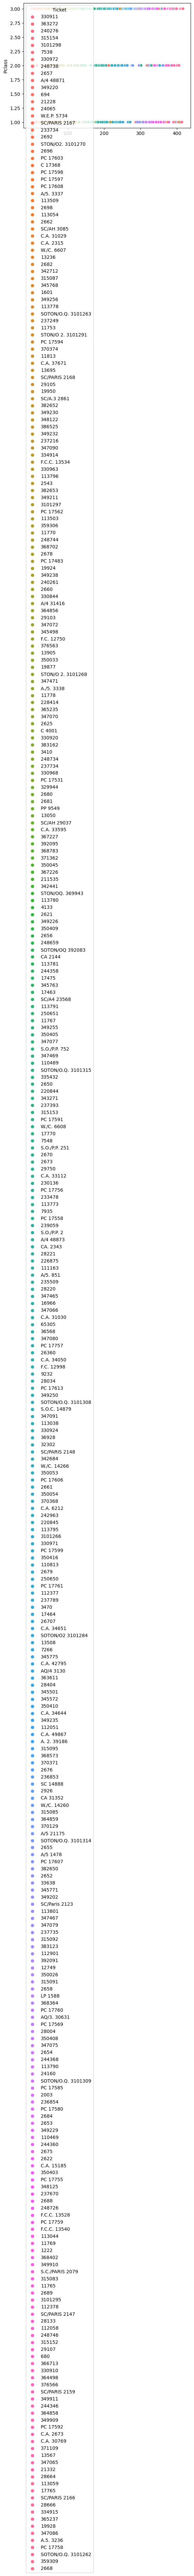

In [104]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Ticket'])

<Axes: ylabel='SibSp'>

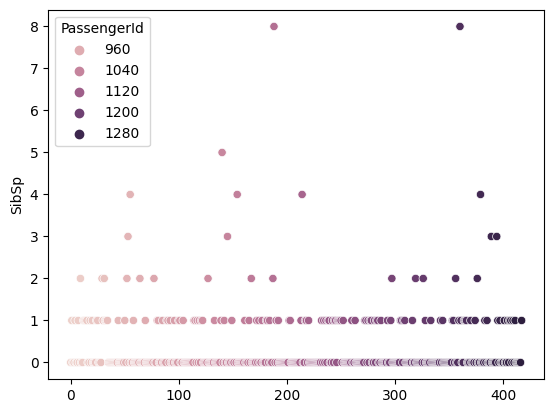

In [105]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['PassengerId'])

<Axes: ylabel='SibSp'>

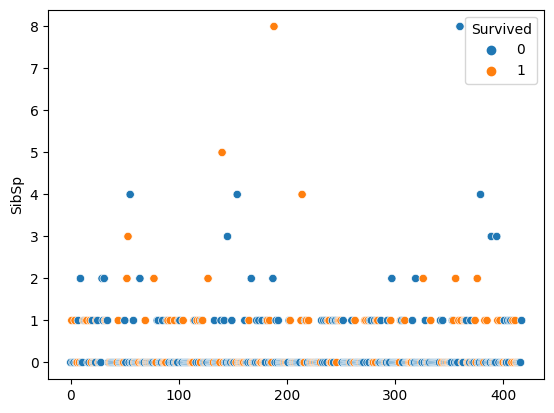

In [106]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Survived'])

<Axes: ylabel='SibSp'>

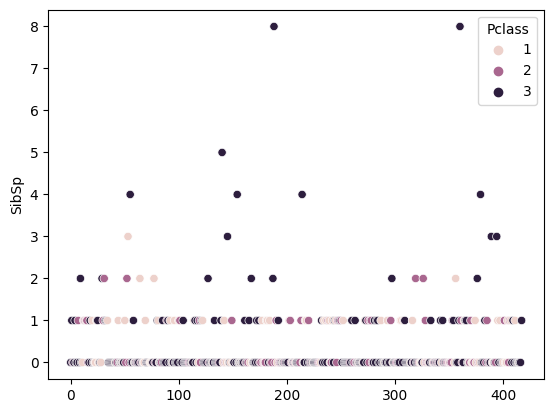

In [107]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Pclass'])

<Axes: ylabel='SibSp'>

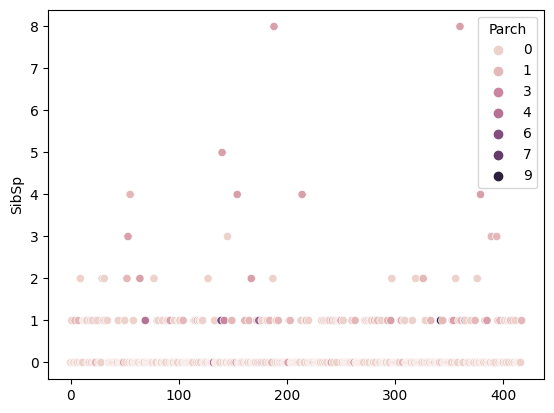

In [108]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Parch'])

<Axes: ylabel='SibSp'>

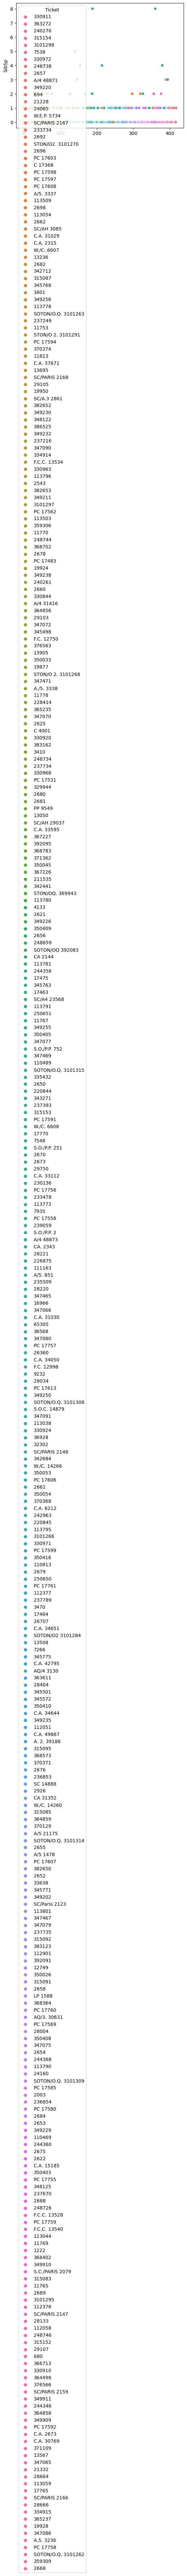

In [109]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Ticket'])

<Axes: ylabel='SibSp'>

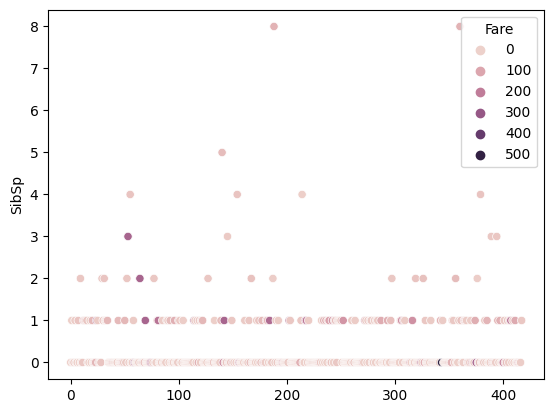

In [110]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Fare'])

<Axes: ylabel='SibSp'>

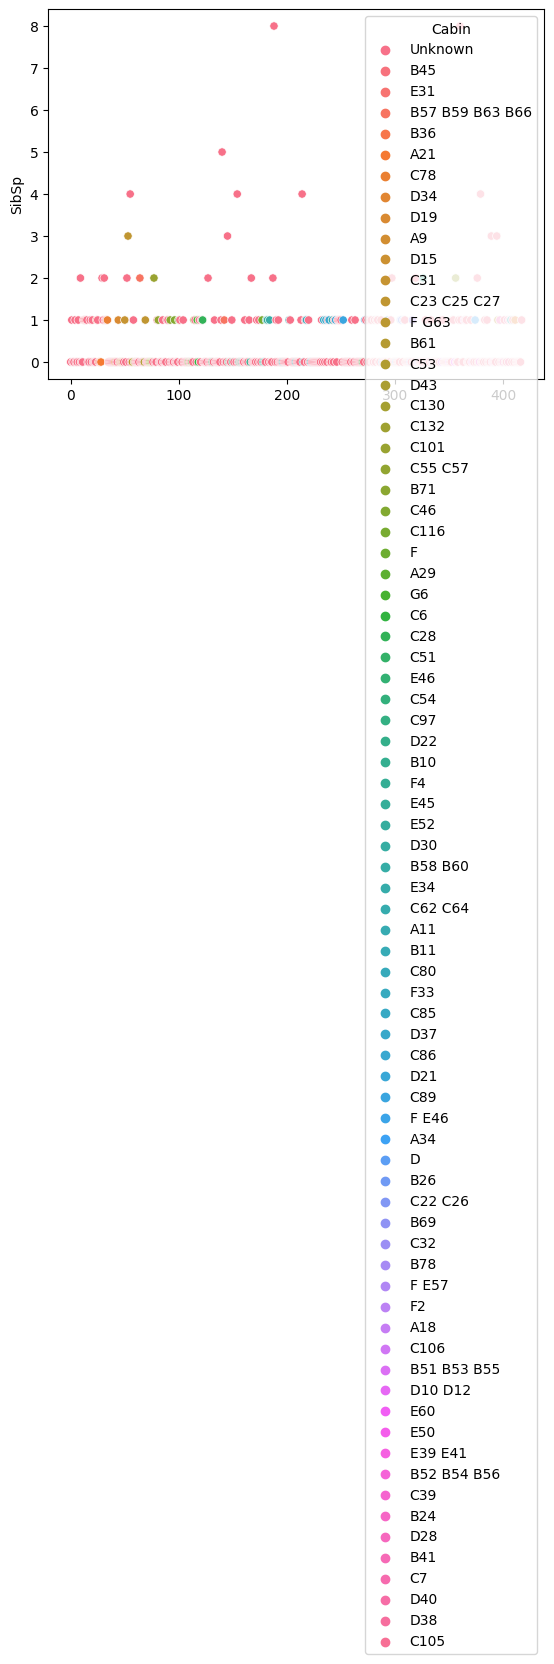

In [111]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Cabin'])

<Axes: ylabel='SibSp'>

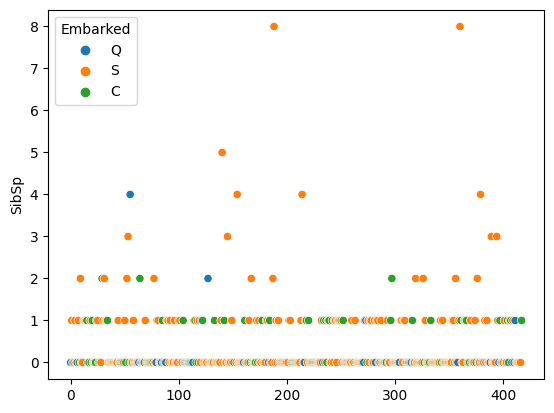

In [112]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Embarked'])

<Axes: xlabel='PassengerId', ylabel='Survived'>

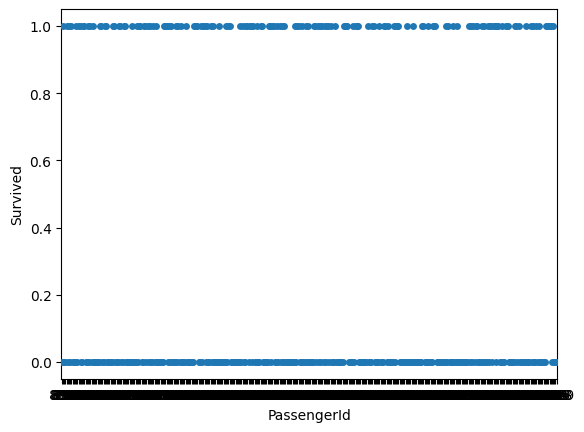

In [113]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Survived'])

<Axes: xlabel='PassengerId', ylabel='Pclass'>

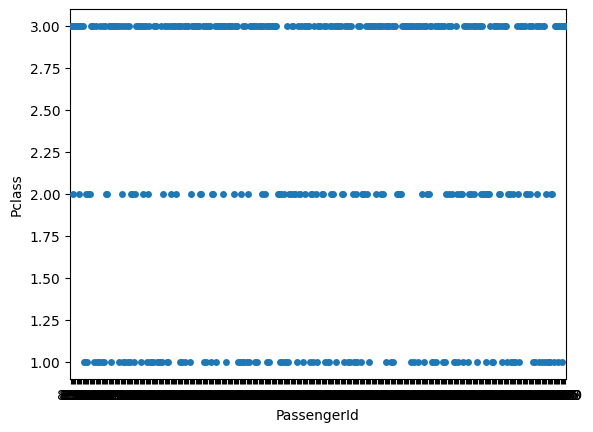

In [114]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Pclass'])

<Axes: xlabel='PassengerId', ylabel='SibSp'>

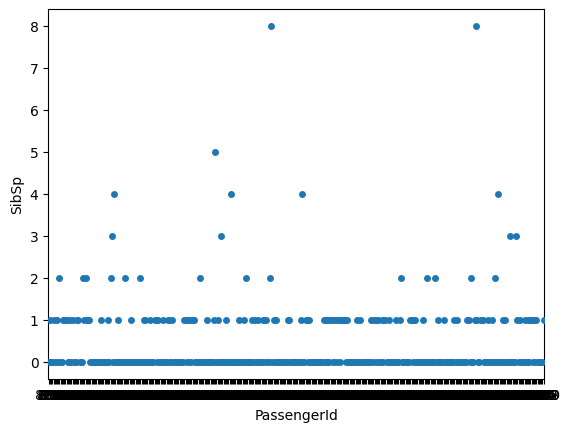

In [115]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['SibSp'])

<Axes: xlabel='PassengerId', ylabel='Parch'>

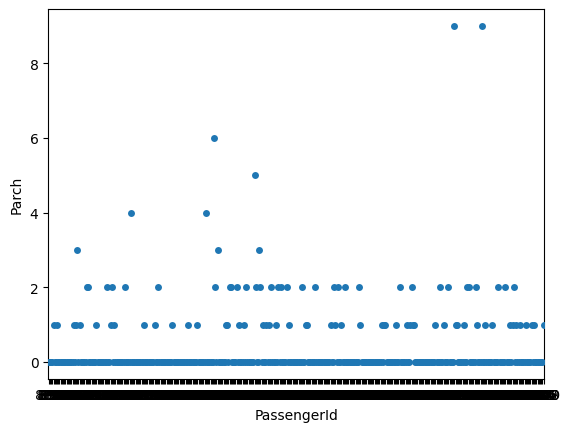

In [116]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Parch'])

<Axes: xlabel='PassengerId', ylabel='Ticket'>

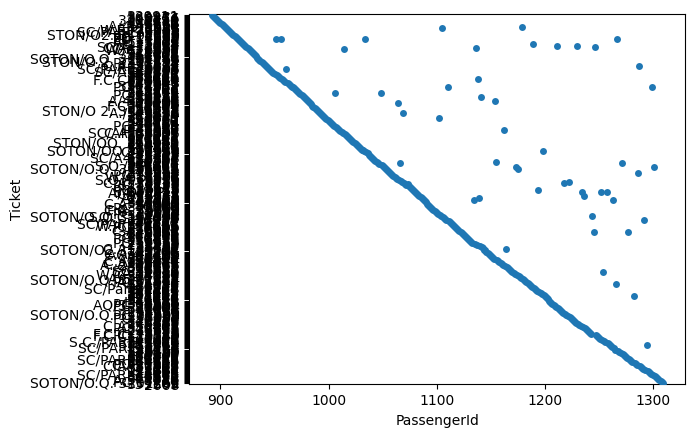

In [117]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Ticket'])

<Axes: xlabel='PassengerId', ylabel='Fare'>

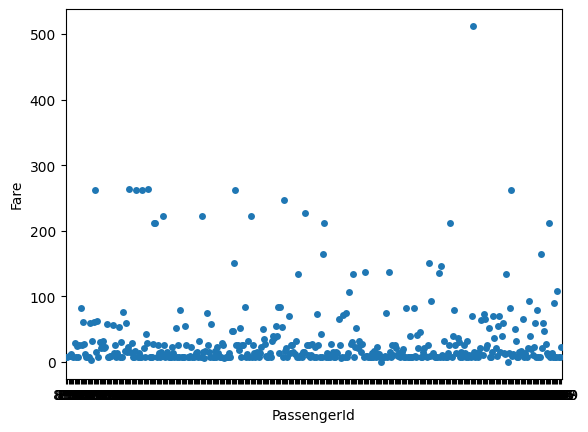

In [118]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Fare'])

<Axes: xlabel='PassengerId', ylabel='Cabin'>

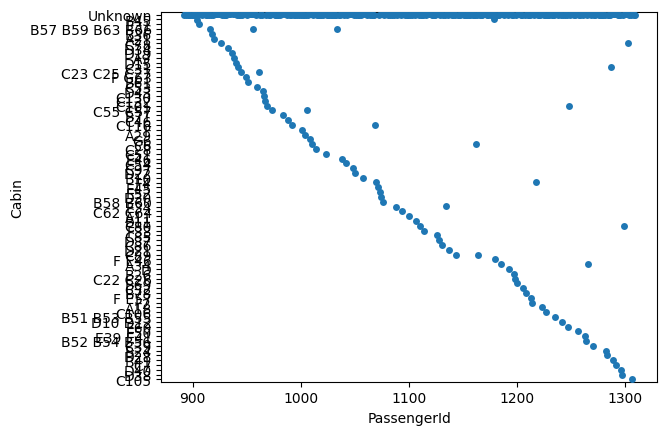

In [119]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Cabin'])

<Axes: xlabel='PassengerId', ylabel='Embarked'>

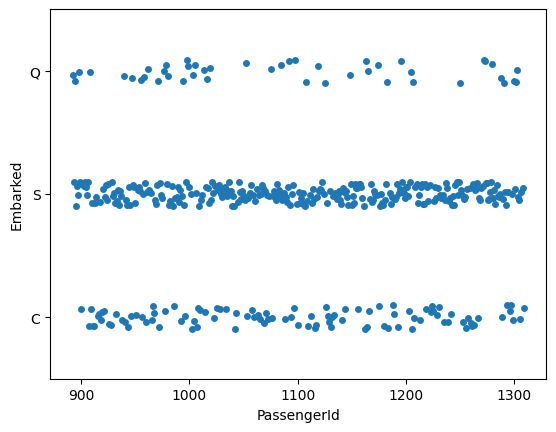

In [120]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Embarked'])

<Axes: xlabel='Survived', ylabel='PassengerId'>

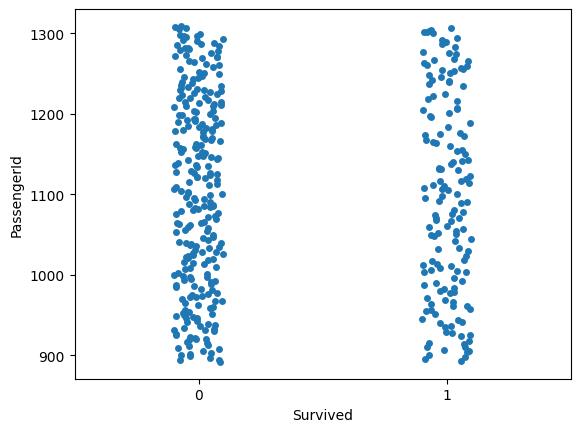

In [121]:
sns.stripplot(x=df_train['Survived'],y=df_train['PassengerId'])

<Axes: xlabel='Survived', ylabel='Pclass'>

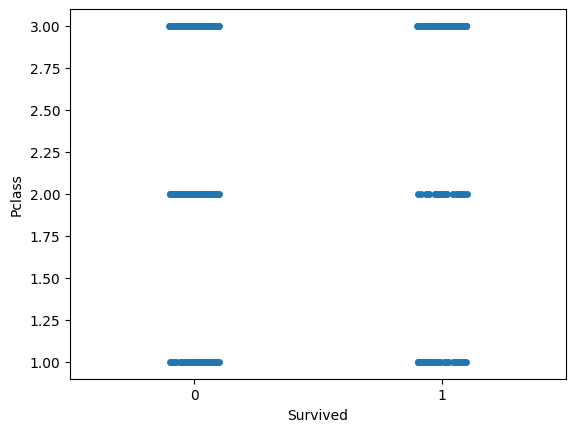

In [122]:
sns.stripplot(x=df_train['Survived'],y=df_train['Pclass'])

<Axes: xlabel='Survived', ylabel='SibSp'>

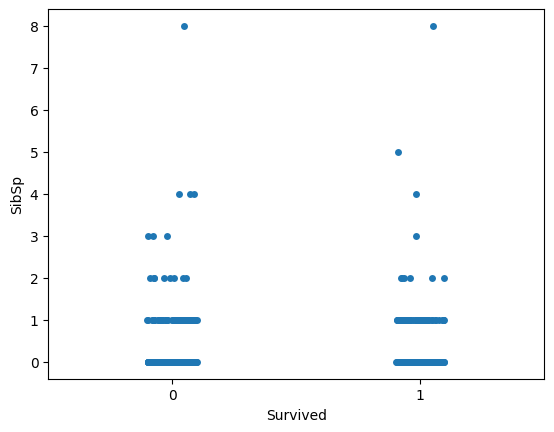

In [123]:
sns.stripplot(x=df_train['Survived'],y=df_train['SibSp'])

<Axes: xlabel='Survived', ylabel='Parch'>

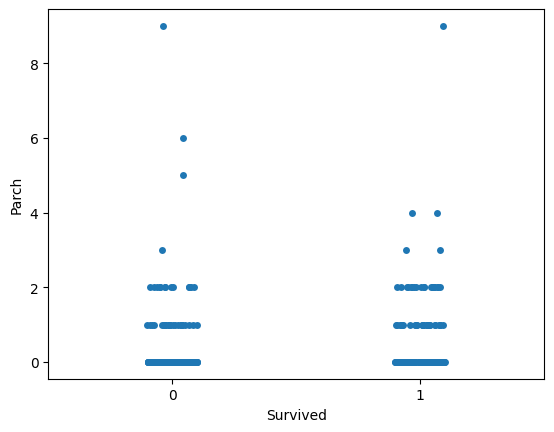

In [124]:
sns.stripplot(x=df_train['Survived'],y=df_train['Parch'])

<Axes: xlabel='Survived', ylabel='Ticket'>

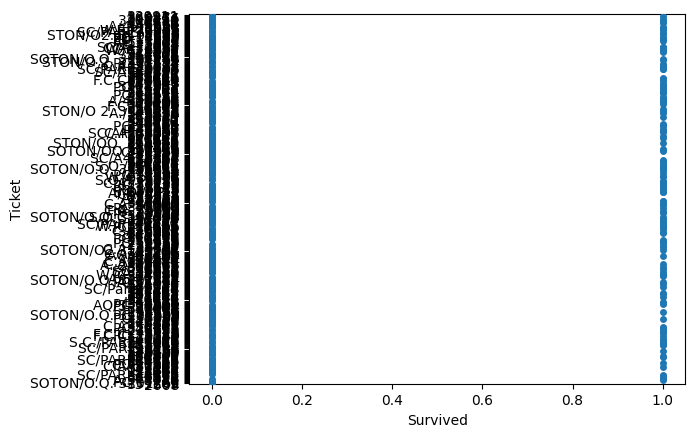

In [125]:
sns.stripplot(x=df_train['Survived'],y=df_train['Ticket'])

<Axes: xlabel='Survived', ylabel='Fare'>

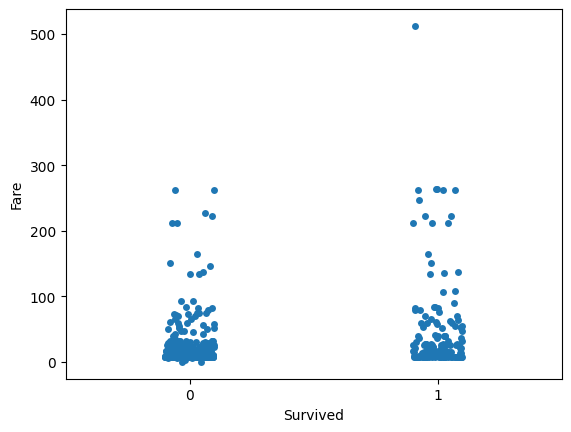

In [126]:
sns.stripplot(x=df_train['Survived'],y=df_train['Fare'])

<Axes: xlabel='Survived', ylabel='Cabin'>

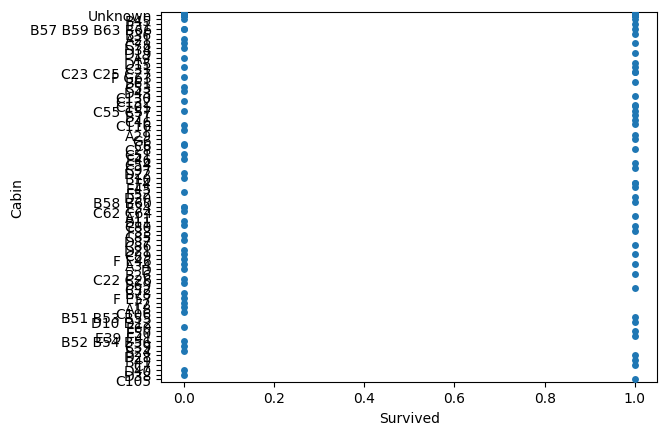

In [115]:
sns.stripplot(x=df_train['Survived'],y=df_train['Cabin'])

<Axes: xlabel='Survived', ylabel='Embarked'>

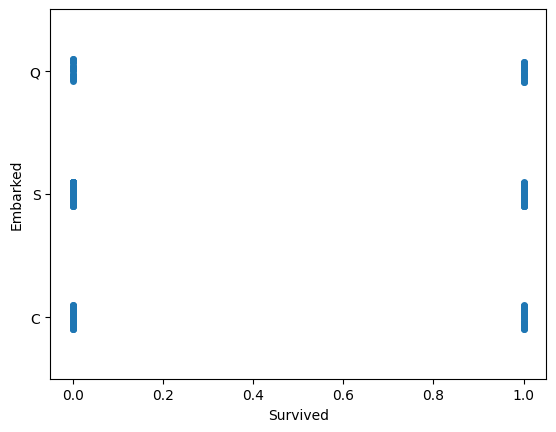

In [116]:
sns.stripplot(x=df_train['Survived'],y=df_train['Embarked'])

<Axes: xlabel='Pclass', ylabel='PassengerId'>

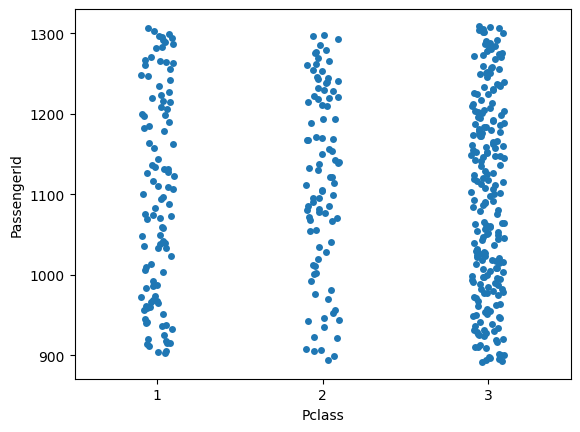

In [117]:
sns.stripplot(x=df_train['Pclass'],y=df_train['PassengerId'])

<Axes: xlabel='Pclass', ylabel='Survived'>

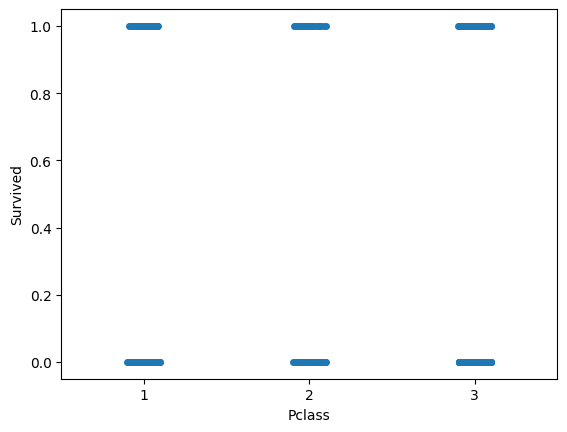

In [118]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Survived'])

<Axes: xlabel='Pclass', ylabel='SibSp'>

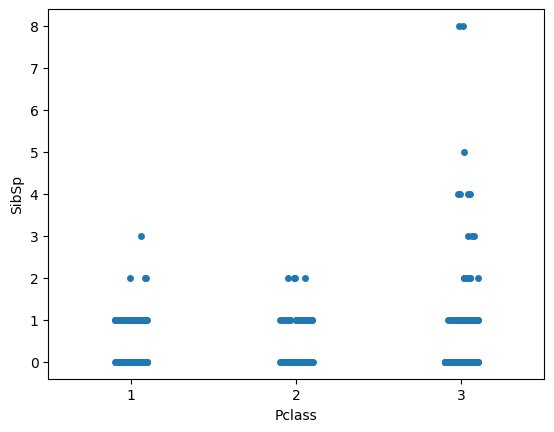

In [119]:
sns.stripplot(x=df_train['Pclass'],y=df_train['SibSp'])

<Axes: xlabel='Pclass', ylabel='Parch'>

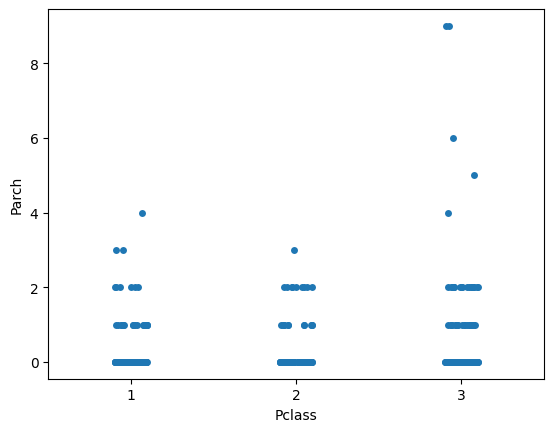

In [120]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Parch'])

<Axes: xlabel='Pclass', ylabel='Ticket'>

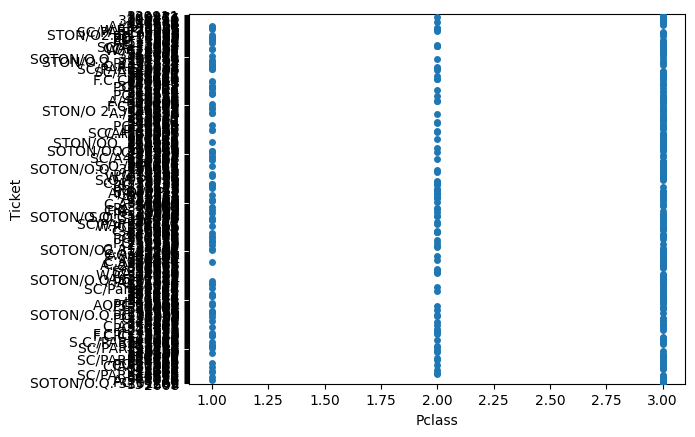

In [121]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Ticket'])

<Axes: xlabel='Pclass', ylabel='Fare'>

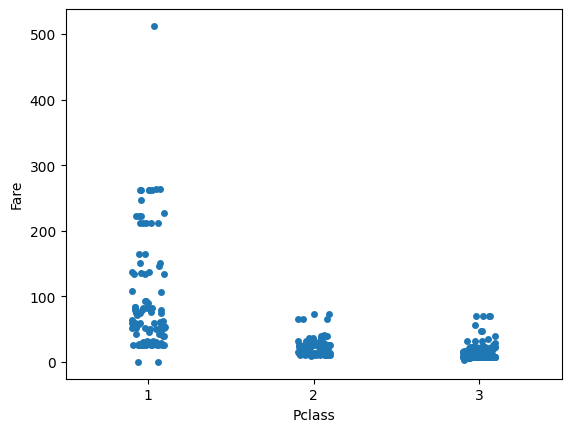

In [122]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Fare'])

<Axes: xlabel='Pclass', ylabel='Cabin'>

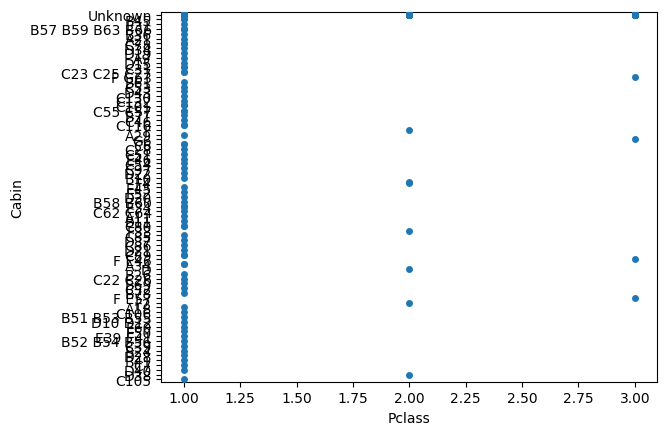

In [123]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Cabin'])

<Axes: xlabel='Pclass', ylabel='Embarked'>

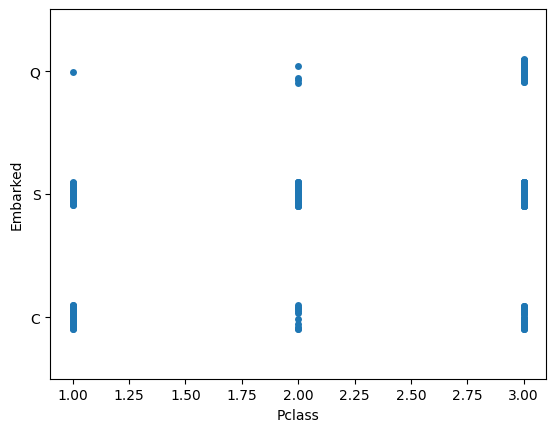

In [124]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Embarked'])

<Axes: xlabel='Age', ylabel='PassengerId'>

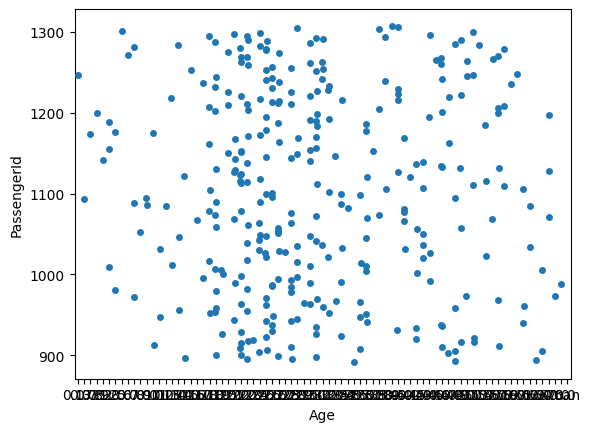

In [125]:
sns.stripplot(x=df_train['Age'],y=df_train['PassengerId'])

<Axes: xlabel='Age', ylabel='Survived'>

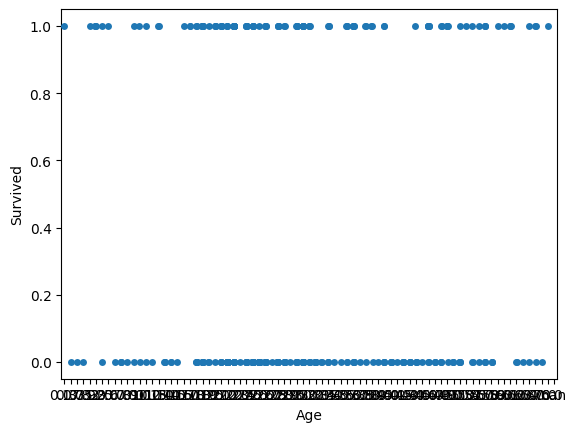

In [126]:
sns.stripplot(x=df_train['Age'],y=df_train['Survived'])

<Axes: xlabel='Age', ylabel='Pclass'>

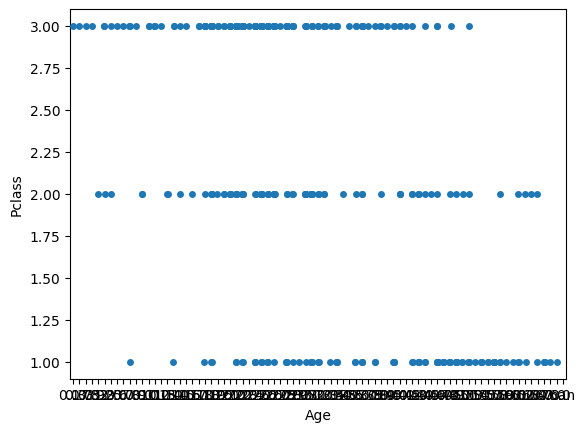

In [127]:
sns.stripplot(x=df_train['Age'],y=df_train['Pclass'])

<Axes: xlabel='Age', ylabel='Ticket'>

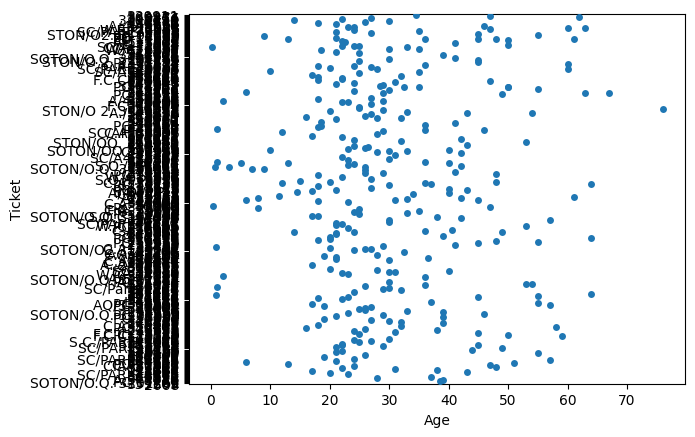

In [128]:
sns.stripplot(x=df_train['Age'],y=df_train['Ticket'])

<Axes: xlabel='Age', ylabel='Cabin'>

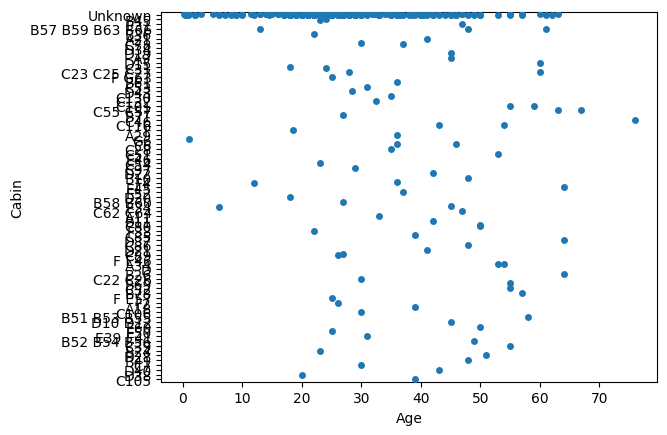

In [129]:
sns.stripplot(x=df_train['Age'],y=df_train['Cabin'])

<Axes: xlabel='Age', ylabel='Embarked'>

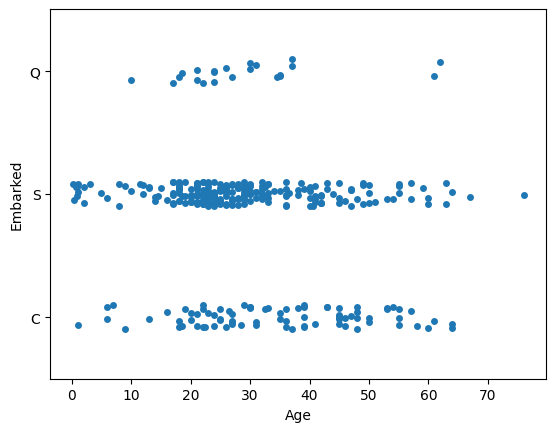

In [130]:
sns.stripplot(x=df_train['Age'],y=df_train['Embarked'])

In [127]:
df_2 = df_train.drop(['Name', 'Ticket','Cabin','PassengerId'], axis=1)


In [128]:
df_train['Embarked'].value_counts()

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64

In [136]:
df_2['Embarked']=df_2['Embarked'].replace("S",1)


In [131]:
df_2['Embarked']=df_2['Embarked'].replace("Q",3)

In [132]:
df_train['Emabrked']=df_train['Embarked'].replace("C",2)

In [137]:
df_2['Embarked'].value_counts()

Embarked
1    269
2    102
3     46
Name: count, dtype: int64

In [139]:
df_2['Sex']=df_2['Sex'].replace("female",2)

In [142]:
df_2['Sex']=df_2['Sex'].replace("male",1)

In [143]:
df_2['Embarked'].value_counts()

Embarked
1    269
2    102
3     46
Name: count, dtype: int64

In [160]:
#data preprocessing

Correlation

In [ ]:
#The corr() method calculates the relationship between each column in your data set.

<Axes: >

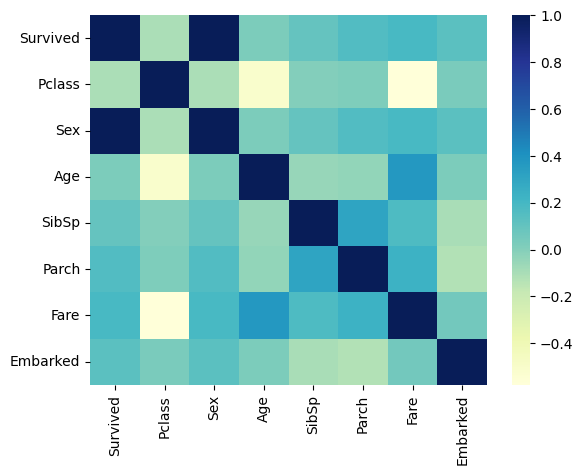

In [140]:
import seaborn as sns
sns.heatmap(df_2.corr(),cmap="YlGnBu")


In [105]:
df_2

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.5      0      0    7.8292         3
1           1       3    2  47.0      1      0    7.0000         1
2           0       2    1  62.0      0      0    9.6875         3
3           0       3    1  27.0      0      0    8.6625         1
4           1       3    2  22.0      1      1   12.2875         1
..        ...     ...  ...   ...    ...    ...       ...       ...
413         0       3    1  21.0      0      0    8.0500         1
414         1       1    2  39.0      0      0  108.9000         2
415         0       3    1  38.5      0      0    7.2500         1
416         0       3    1  21.0      0      0    8.0500         1
417         0       3    1  21.0      1      1   22.3583         2

[417 rows x 8 columns]

In [ ]:
#feautre Scaling

In [106]:
#standarlization:

In [107]:
df_2

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.5      0      0    7.8292         3
1           1       3    2  47.0      1      0    7.0000         1
2           0       2    1  62.0      0      0    9.6875         3
3           0       3    1  27.0      0      0    8.6625         1
4           1       3    2  22.0      1      1   12.2875         1
..        ...     ...  ...   ...    ...    ...       ...       ...
413         0       3    1  21.0      0      0    8.0500         1
414         1       1    2  39.0      0      0  108.9000         2
415         0       3    1  38.5      0      0    7.2500         1
416         0       3    1  21.0      0      0    8.0500         1
417         0       3    1  21.0      1      1   22.3583         2

[417 rows x 8 columns]

In [ ]:
#Data standardization is converting data into a standard format that computers can easily understand and use. 

In [109]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df_2)

# Perform standardization on the DataFrame
df_standardized = scaler.transform(df_2)
# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df_2.columns)
df_standardized

Survived    Pclass       Sex       Age     SibSp     Parch      Fare  \
0   -0.757354  0.875330 -0.757354  0.474738 -0.500218 -0.400804 -0.497811   
1    1.320387  0.875330  1.320387  1.429986  0.615242 -0.400804 -0.512660   
2   -0.757354 -0.313636 -0.757354  2.576283 -0.500218 -0.400804 -0.464532   
3   -0.757354  0.875330 -0.757354 -0.098411 -0.500218 -0.400804 -0.482888   
4    1.320387  0.875330  1.320387 -0.480510  0.615242  0.618314 -0.417971   
..        ...       ...       ...       ...       ...       ...       ...   
412 -0.757354  0.875330 -0.757354 -0.556930 -0.500218 -0.400804 -0.493856   
413  1.320387 -1.502602  1.320387  0.818627 -0.500218 -0.400804  1.312180   
414 -0.757354  0.875330 -0.757354  0.780417 -0.500218 -0.400804 -0.508183   
415 -0.757354  0.875330 -0.757354 -0.556930 -0.500218 -0.400804 -0.493856   
416 -0.757354  0.875330 -0.757354 -0.556930  0.615242  0.618314 -0.237621   

     Embarked  
0    2.240091  
1   -0.679028  
2    2.240091  
3   -0.679028  
4   -0.679028  
..        ...  
412 -0.679028  
413  0.780532  
414 -0.679028  
415 -0.679028  
416  0.780532  

[417 rows x 8 columns]

In [147]:



# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(df_2)

# Perform normalization on the DataFrame
df_normalized = scaler.transform(df_2)

# Convert the normalized array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df_2.columns)

# Print the normalized DataFrame
df_normalized

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0         0.0     1.0  0.0  0.452723  0.000  0.000000  0.015282       1.0
1         1.0     1.0  1.0  0.617566  0.125  0.000000  0.013663       0.0
2         0.0     0.5  0.0  0.815377  0.000  0.000000  0.018909       1.0
3         0.0     1.0  0.0  0.353818  0.000  0.000000  0.016908       0.0
4         1.0     1.0  1.0  0.287881  0.125  0.111111  0.023984       0.0
..        ...     ...  ...       ...    ...       ...       ...       ...
412       0.0     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
413       1.0     0.0  1.0  0.512066  0.000  0.000000  0.212559       0.5
414       0.0     1.0  0.0  0.505473  0.000  0.000000  0.014151       0.0
415       0.0     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
416       0.0     1.0  0.0  0.274693  0.125  0.111111  0.043640       0.5

[417 rows x 8 columns]

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x=df_normalized.drop(['Survived'],axis=1)
print(x)

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       1.0  0.0  0.452723  0.000  0.000000  0.015282       1.0
1       1.0  1.0  0.617566  0.125  0.000000  0.013663       0.0
2       0.5  0.0  0.815377  0.000  0.000000  0.018909       1.0
3       1.0  0.0  0.353818  0.000  0.000000  0.016908       0.0
4       1.0  1.0  0.287881  0.125  0.111111  0.023984       0.0
..      ...  ...       ...    ...       ...       ...       ...
412     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
413     0.0  1.0  0.512066  0.000  0.000000  0.212559       0.5
414     1.0  0.0  0.505473  0.000  0.000000  0.014151       0.0
415     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
416     1.0  0.0  0.274693  0.125  0.111111  0.043640       0.5

[417 rows x 7 columns]


In [150]:
y=df_normalized['Survived']
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
412    0.0
413    1.0
414    0.0
415    0.0
416    0.0
Name: Survived, Length: 417, dtype: float64

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
       

In [152]:
x_test

Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
409     1.0  1.0  0.274693  0.000  0.000000  0.015127       1.0
170     1.0  0.0  0.353818  0.000  0.000000  0.014102       0.5
224     1.0  1.0  0.274693  0.000  0.222222  0.029758       0.5
390     0.0  1.0  0.670315  0.000  0.111111  0.076904       0.0
308     1.0  1.0  0.591191  0.125  0.000000  0.027538       0.0
..      ...  ...       ...    ...       ...       ...       ...
389     0.0  0.0  0.301068  0.000  0.000000  0.182500       0.0
358     1.0  1.0  0.393380  0.125  0.000000  0.030352       0.0
217     0.0  1.0  0.657128  0.125  0.111111  0.412821       0.5
400     0.5  0.0  0.498879  0.125  0.000000  0.040989       0.0
340     1.0  0.0  0.419755  0.000  0.000000  0.014794       0.0

[105 rows x 7 columns]

In [153]:
x_train

Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
208     1.0  0.0  0.327443  0.000  0.000000  0.015412       0.0
56      1.0  0.0  0.459317  0.000  0.000000  0.015412       0.0
8       1.0  1.0  0.235131  0.000  0.000000  0.014110       0.5
399     0.0  1.0  0.393380  0.000  0.000000  0.321798       0.0
155     0.0  1.0  0.380193  0.000  0.000000  0.432884       0.0
..      ...  ...       ...    ...       ...       ...       ...
323     0.0  1.0  0.512066  0.000  0.000000  0.412503       0.0
192     0.5  0.0  0.802189  0.000  0.000000  0.024106       1.0
117     1.0  1.0  0.010946  0.125  0.111111  0.032596       0.0
47      1.0  0.0  0.274693  0.000  0.000000  0.015127       1.0
172     1.0  0.0  0.274693  0.000  0.000000  0.014110       0.5

[312 rows x 7 columns]

In [154]:
y_train

208    0.0
56     0.0
8      1.0
399    1.0
155    1.0
      ... 
323    1.0
192    0.0
117    1.0
47     0.0
172    0.0
Name: Survived, Length: 312, dtype: float64

In [155]:
y_test

409    1.0
170    0.0
224    1.0
390    1.0
308    1.0
      ... 
389    0.0
358    1.0
217    1.0
400    0.0
340    0.0
Name: Survived, Length: 105, dtype: float64

In [158]:

# Assuming you have your features (X) and target variable (y) ready
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

    # Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [159]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted no','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted no  Predicted Yes
Actual No             50              0
Actual Yes             0             34